<a href="https://colab.research.google.com/github/RajbanulAkhond/Computational_ToolKit/blob/main/Trimer_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Finder
Author: Md. Rajbanul Akhond

In [1]:
!pip install ase
!pip install pymatgen
!pip install mp-api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━

# Transition Metal distance
Let's get the transition metal (atom-atom) distances for pure metal

In [2]:
from mp_api.client import MPRester
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.core.structure import Structure
from pymatgen.core.periodic_table import Element
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import networkx as nx
import numpy as np

# Define the Materials Project API key
API_KEY = "6rcVBNjGRVyfiGPYaLy2xVJNB9X8cN8q"

# Constants and Parameters
MAX_RADIUS = 3.5  # Maximum atom-to-atom distance for trimer (cluster) search
CLUSTER_SIZE = 2
# List of common transition metals
transition_metals = [
    "Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn",
    "Y", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", "Cd",
    "Hf", "Ta", "W", "Re", "Os", "Ir", "Pt", "Au"
]

In [23]:
def calculate_metal_distances(metal_list, api_key):
    distances = {}
    with MPRester(api_key) as mpr:
        for metal in metal_list:
            results = mpr.materials.summary.search(elements=[metal], energy_above_hull=(0, 0), num_elements=(1, 1), fields=["structure"])
            if results:
                structure = Structure.from_dict(results[0].structure.as_dict())
                metal_sites = list(structure)
                distances[metal] = min(site.distance(other_site) for i, site in enumerate(metal_sites) for other_site in metal_sites[i+1:]) if len(metal_sites) > 1 else structure.lattice.a
            else:
                distances[metal] = None
    return distances

In [24]:
metal_distances = calculate_metal_distances(transition_metals, API_KEY)
metal_distances

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

{'Sc': 3.2741095571133685,
 'Ti': 2.6369722796969812,
 'V': 2.5828336109207948,
 'Cr': 2.5710695451531222,
 'Mn': 2.4002245364252475,
 'Fe': 2.4811048673974856,
 'Co': 2.4842888010729123,
 'Ni': 2.457298948810437,
 'Cu': 2.5296252999953506,
 'Zn': 2.866219226038426,
 'Y': 3.6144001247378097,
 'Zr': 3.191472539285153,
 'Nb': 2.8731547070309853,
 'Mo': 2.7432375552201087,
 'Tc': 2.706488111212691,
 'Ru': 2.6454254654131453,
 'Rh': 2.6912281905108695,
 'Pd': 2.769950055644841,
 'Ag': 2.902154510695932,
 'Cd': 3.4027274289870264,
 'Hf': 3.124133475129909,
 'Ta': 2.644351301413207,
 'W': 2.745573721758673,
 'Re': 2.746796112026075,
 'Os': 2.6819758645401435,
 'Ir': 2.7251400874857388,
 'Pt': 2.7882282983380127,
 'Au': 2.9495462029697044}

# Pre-filter
Lets filter by transition metal compounds, number of atoms and total magnetization

In [3]:
# Initialize the MPRester
with MPRester(API_KEY) as mpr:
    # Transition metal compound of interest
    transition_metals_c = ["Nb", "Cl"]

    entries = mpr.materials.summary.search(
        elements = transition_metals_c,
        num_elements = (2, 4),
        total_magnetization=(0.001, None),
        fields=["material_id", "formula_pretty", "structure", "total_magnetization"]
    )

Retrieving SummaryDoc documents:   0%|          | 0/54 [00:00<?, ?it/s]

In [21]:
print("Transition metal compound search space:")
for entry in entries:
            print(
                f"Material ID: {entry.material_id}, "
                f"Formula: {entry.formula_pretty}, "
                f"Magnetization: {entry.total_magnetization} μB, "
            )

Transition metal compound search space:
Material ID: mp-669521, Formula: Nb3Te4ClO15, Magnetization: 0.0034586 μB, 
Material ID: mp-1199992, Formula: Nb3Te4ClO15, Magnetization: 0.0049222 μB, 
Material ID: mp-674326, Formula: K2NbCl3, Magnetization: 16.9263328 μB, 
Material ID: mp-1209779, Formula: Pr3Nb(ClO2)3, Magnetization: 1.995196099999999 μB, 
Material ID: mp-1209927, Formula: Nd3Nb(ClO2)3, Magnetization: 0.1597979 μB, 
Material ID: mp-1211272, Formula: La3Nb(ClO2)3, Magnetization: 1.9328499 μB, 
Material ID: mp-1204459, Formula: NbTe4Cl4O, Magnetization: 0.10369199999999901 μB, 
Material ID: mp-1203891, Formula: NbN2Cl5, Magnetization: 22.0160469 μB, 
Material ID: mp-561020, Formula: NbP4(SCl)5, Magnetization: 0.005066699999999 μB, 
Material ID: mp-570486, Formula: NbP2Se2Cl5, Magnetization: 0.026463 μB, 
Material ID: mp-679987, Formula: NbP2S2Cl5, Magnetization: 0.00143 μB, 
Material ID: mp-1180763, Formula: Nb3(Cl3O4)2, Magnetization: 4.0000002 μB, 
Material ID: mp-568405, For

# Simple Trimer Finder
Search for trimer clusters by going through all unique transition metal positions

In [25]:
# Find non-equivalent transition metal atom positions
def find_non_equivalent_positions(structure, transition_metals):
    unique_sites = []
    seen = set()  # Set to store unique (symbol, fractional coordinates) tuples

    for site in structure:
        if hasattr(site.specie, 'symbol') and site.specie.symbol in transition_metals:
            site_key = (site.specie.symbol, tuple(site.frac_coords))
            if site_key not in seen:
                seen.add(site_key)
                unique_sites.append(site)

    return unique_sites

# Search for trimer clusters
def find_trimers(structure, unique_sites, distances, transition_metals):
    return [
        (site, [n for n in structure.get_neighbors(site, distances.get(site.specie.symbol)) if n.specie.symbol in transition_metals][:2])
        for site in unique_sites
        if distances.get(site.specie.symbol) and len([n for n in structure.get_neighbors(site, distances[site.specie.symbol]) if n.specie.symbol in transition_metals]) >= 2
    ]

    # Analyze results and identify compounds with trimers
compounds_with_trimers = []

for result in entries:
    structure = result.structure
    material_id = result.material_id
    formula = result.formula_pretty

    unique_sites = find_non_equivalent_positions(structure, transition_metals)
    trimers = find_trimers(structure, unique_sites, metal_distances, transition_metals)

    if trimers:
        compounds_with_trimers.append({"material_id": material_id,"formula": formula, "trimers": trimers})

# Output results
print(f"Found {len(compounds_with_trimers)} compounds with trimer clusters.")
for compound in compounds_with_trimers:
    print(f"Material ID: {compound['material_id']}, Formula: {compound['formula']}")

Found 6 compounds with trimer clusters.
Material ID: mp-561357, Formula: TiNb3Cl7O2
Material ID: mp-29950, Formula: Nb3Cl8
Material ID: mp-1211867, Formula: KNb3VCl11
Material ID: mp-1213417, Formula: CsNb3VCl11
Material ID: mp-570445, Formula: RbNb3VCl11
Material ID: mp-680696, Formula: Nb3TlVCl11


# Cluster analysis (Advanced)
Cluster analysis using Connectivity Matrix and Graph


In [4]:
# Step 1: Create Connectivity Matrix (Only for Transition Metals)
def create_connectivity_matrix(structure, transition_metals, cutoff=MAX_RADIUS):
    tm_indices = [i for i, site in enumerate(structure.sites) if site.specie.symbol in transition_metals]
    num_sites = len(tm_indices)
    connectivity_matrix = np.zeros((num_sites, num_sites), dtype=int)

    for i, index1 in enumerate(tm_indices):
        site1 = structure.sites[index1]
        # Create connectivity in a single pass for pairs (i, j) with i < j
        for j in range(i + 1, num_sites):
            site2 = structure.sites[tm_indices[j]]
            if site1.distance(site2) < cutoff:
                connectivity_matrix[i, j] = connectivity_matrix[j, i] = 1

    return connectivity_matrix, tm_indices


# Step 2: Graph Representation
def structure_to_graph(connectivity_matrix):
    G = nx.Graph()
    for i in range(len(connectivity_matrix)):
        for j in range(len(connectivity_matrix)):
            if connectivity_matrix[i, j] == 1:
                G.add_edge(i, j)
    return G

# Step 3: Cluster Identification
def find_clusters(structure, graph, tm_indices):
    clusters = []
    for component in nx.connected_components(graph):
        cluster_indices = [tm_indices[i] for i in component]
        cluster = [structure.sites[i] for i in cluster_indices]
        if len(cluster) >= CLUSTER_SIZE:  # Filter clusters with number of atoms
            clusters.append(cluster)
    return clusters


In [19]:
from itertools import combinations

def calculate_centroid(cluster, lattice):
    """
    Calculate the geometric centroid of a cluster using fractional coordinates.

    Parameters:
        cluster (list): List of pymatgen Site objects.
        lattice (Lattice): The lattice object from the original structure.

    Returns:
        np.ndarray: The centroid in Cartesian coordinates.

    Raises:
        ValueError: If cluster is empty.
    """
    if not cluster:
        raise ValueError("Cluster cannot be empty.")
    frac_coords = np.array([lattice.get_fractional_coords(site.coords) for site in cluster])
    avg_frac = np.mean(frac_coords, axis=0)
    return lattice.get_cartesian_coords(avg_frac)

def calculate_average_distance(cluster, max_radius=MAX_RADIUS):
    """
    Calculate the average distance between sites in a cluster.

    Parameters:
        cluster (list): List of pymatgen Site objects.
        max_radius (float): Maximum distance for considering edges.

    Returns:
        float: Average distance between sites, or 0 if no edges exist.
    """
    edges = [(site1, site2) for site1, site2 in combinations(cluster, 2)
             if site1.distance(site2) < max_radius]
    distances = [site1.distance(site2) for site1, site2 in edges]
    return np.mean(distances) if distances else 0

def build_graph(cluster, cutoff, distances_cache):
    """
    Build a graph based on the distance cutoff using precomputed distances.

    Parameters:
        cluster (list): List of pymatgen Site objects.
        cutoff (float): Distance cutoff for connectivity.
        distances_cache (dict): Cached distances between sites.

    Returns:
        nx.Graph: Graph representing connectivity.
    """
    graph = nx.Graph()
    for (i, j), dist in distances_cache.items():
        if dist < cutoff:
            graph.add_edge(i, j)
    return graph

def split_cluster(cluster, parent_avg_distance, lattice, cluster_size=CLUSTER_SIZE+1, initial_cutoff=3.5,
                 cutoff_step=0.001, min_cutoff=2.5, tolerance=0.01, centroid_threshold=0.1):
    """
    Split large clusters into smaller sub-clusters with centroid distance checks.

    Parameters:
        cluster (list): List of pymatgen Site objects.
        parent_avg_distance (float): Average distance of the parent cluster.
        lattice (Lattice): Lattice object for centroid calculations.
        cluster_size (int): Desired maximum cluster size.
        initial_cutoff (float): Initial distance cutoff.
        cutoff_step (float): Step to reduce cutoff.
        min_cutoff (float): Minimum cutoff distance.
        tolerance (float): Tolerance for average distance difference.
        centroid_threshold (float): Minimum distance between centroids.

    Returns:
        list: List of sub-clusters or [cluster] if no split is performed.

    Raises:
        ValueError: If cluster is invalid or lattice is None.
    """

    # Cache distances once to avoid redundant calculations
    distances_cache = {}
    for i, site1 in enumerate(cluster):
        for j, site2 in enumerate(cluster[i+1:], start=i+1):
            distances_cache[(i, j)] = site1.distance(site2)

    current_cutoff = initial_cutoff
    while current_cutoff >= min_cutoff:
        # Build graph with cached distances
        graph = build_graph(cluster, current_cutoff, distances_cache)

        # Identify candidate sub-clusters
        candidate_sub_clusters = []
        for component in nx.connected_components(graph):
            sub_cluster = [cluster[i] for i in component]
            if len(sub_cluster) >= 2:
                sub_avg_distance = calculate_average_distance(sub_cluster, initial_cutoff)
                if (parent_avg_distance - sub_avg_distance) > tolerance:
                    candidate_sub_clusters.append(sub_cluster)

        # Process candidates if any
        if candidate_sub_clusters:
            # Calculate centroids
            centroids = [calculate_centroid(sub_cluster, lattice)
                        for sub_cluster in candidate_sub_clusters]

            # Check centroid distances efficiently
            for i, centroid_i in enumerate(centroids):
                for centroid_j in centroids[i+1:]:
                    if np.linalg.norm(centroid_i - centroid_j) < centroid_threshold:
                        return [cluster]  # Early exit if centroids are too close

            # Process sub-clusters
            sub_clusters = []
            for sub_cluster in candidate_sub_clusters:
                if len(sub_cluster) > cluster_size:
                    sub_clusters.extend(
                        split_cluster(sub_cluster,
                                    calculate_average_distance(sub_cluster, initial_cutoff),
                                    lattice, cluster_size, initial_cutoff, cutoff_step,
                                    min_cutoff, tolerance, centroid_threshold))
                else:
                    sub_clusters.append(sub_cluster)
            return sub_clusters

        current_cutoff -= cutoff_step

    # No valid split found
    return [cluster]


In [12]:
# Step 4: Analyze Clusters and Split Large Clusters
def analyze_clusters(clusters, lattice, cluster_size = CLUSTER_SIZE+1):
    analyzed_clusters = []

    for cluster in clusters:

        average_distance = calculate_average_distance(cluster)

        if len(cluster) > cluster_size:  # Split cluster if it has more than CLUSTER_SIZE+1 atoms
            sub_clusters = split_cluster(cluster, average_distance, lattice=lattice, centroid_threshold=0.1)
            if sub_clusters:
                for sub_cluster in sub_clusters:
                    sub_avg_distance = calculate_average_distance(sub_cluster)
                    analyzed_clusters.append({"size": len(sub_cluster), "average_distance": sub_avg_distance, "sites": sub_cluster})
            else:
                analyzed_clusters.append({"size": len(cluster), "average_distance": average_distance, "sites": cluster})
        else:
            analyzed_clusters.append({"size": len(cluster), "average_distance": average_distance, "sites": cluster})

    return analyzed_clusters

In [7]:
import matplotlib.pyplot as plt

def visualize_graph(graph, structure, tm_indices, material_id, formula):
    """
    Visualize the graph for TM connectivity, including distance labels on edges.
    Resolve label and node overlap issues for clarity.
    """
    if len(graph.edges) < 1:
        return

    print(f"Material ID: {material_id}, Formula: {formula}")

    # Define edge weights inversely proportional to distances for dynamic lengths
    edge_weights = {
        (u, v): 1 / max(structure.sites[tm_indices[u]].distance(structure.sites[tm_indices[v]]), 1e-5)
        for u, v in graph.edges
    }

    # Generate positions using Kamada-Kawai layout for better spacing
    pos = nx.kamada_kawai_layout(graph, weight=None)  # Weight can be None or 'weight'

    plt.figure(figsize=(10, 10))

    # Draw nodes
    nx.draw_networkx_nodes(
        graph, pos, node_size=800, node_color="skyblue", edgecolors="black", alpha=0.9, label="TM Sites"
    )

    # Draw edges
    nx.draw_networkx_edges(graph, pos, width=2.0, alpha=0.7, edge_color="gray")

    # Add labels to nodes with element symbols (offset to avoid overlap)
    labels = {i: structure.sites[tm_indices[i]].specie.symbol for i in graph.nodes}
    for node, (x, y) in pos.items():
        plt.text(
            x, y,
            labels[node],
            fontsize=10,
            fontweight='bold',
            color="black",
            ha="center",
            va="center"
        )

    # Add edge labels (distances)
    edge_labels = {
        (u, v): f"{structure.sites[tm_indices[u]].distance(structure.sites[tm_indices[v]]):.2f} Å"
        for u, v in graph.edges
    }
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    # Title and legend
    plt.title(f"Graph Representation of the Top Level TM Connectivity for {formula} ({material_id})", fontsize=16)
    plt.legend(loc="upper right")
    plt.axis("off")
    plt.show()


Material ID: mp-674326, Formula: K2NbCl3


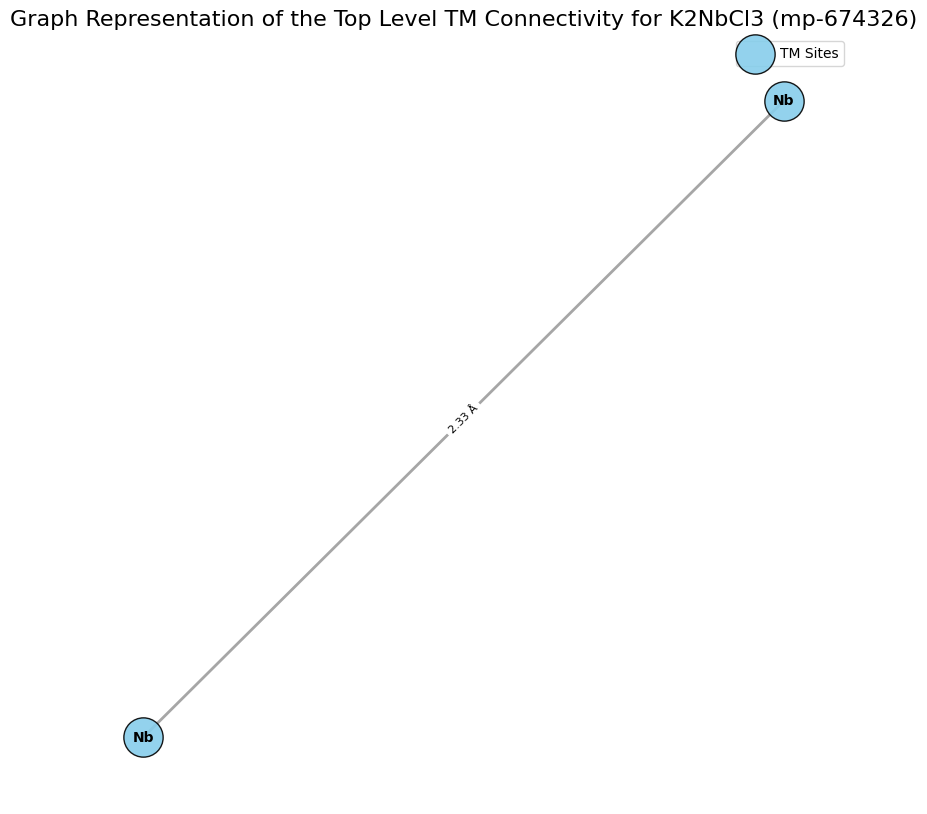

Material ID: mp-1180763, Formula: Nb3(Cl3O4)2


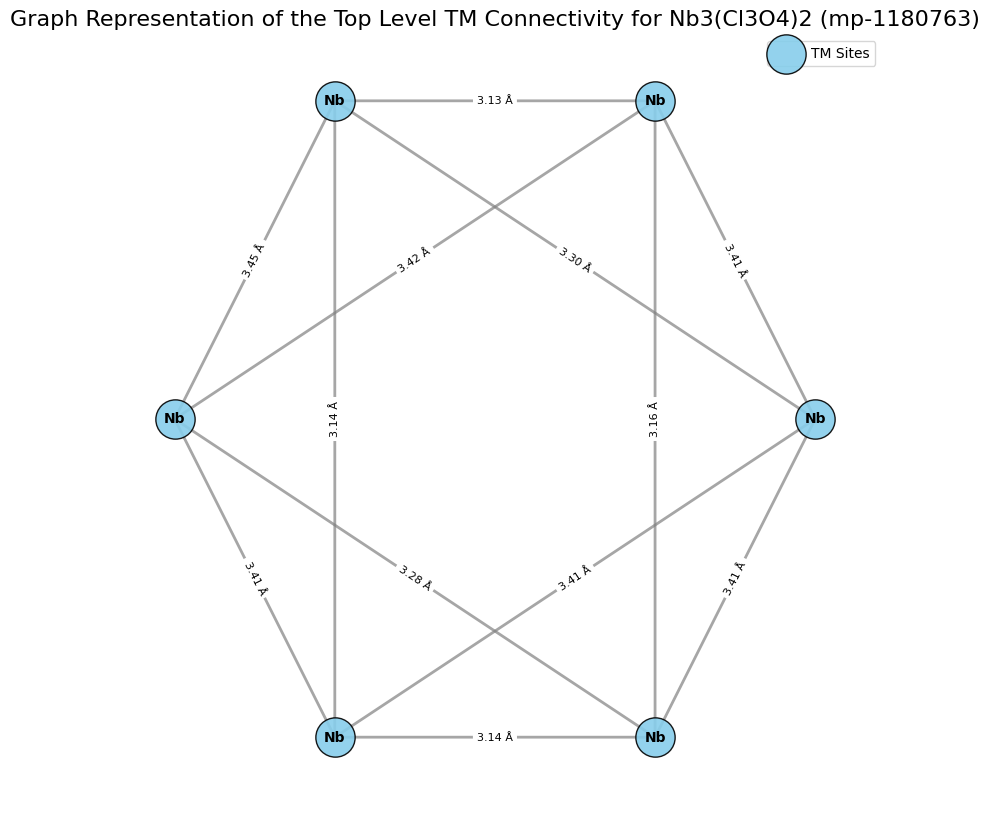

Material ID: mp-1196556, Formula: Nb3(Cl3O4)2


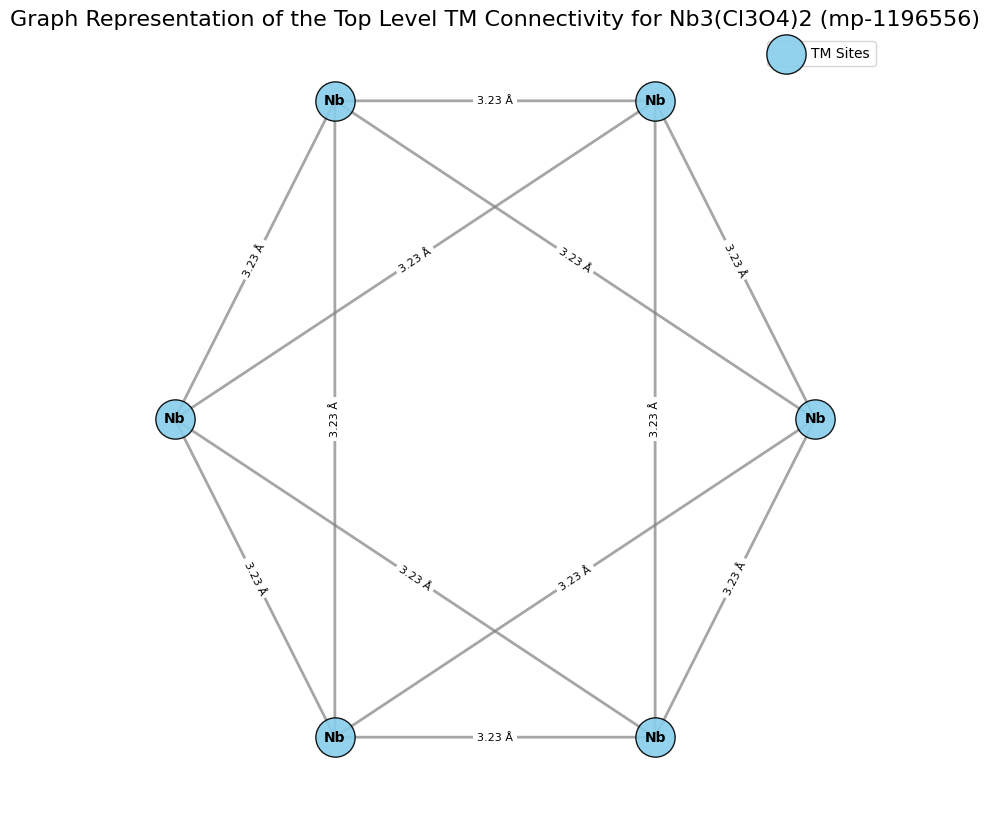

Material ID: mp-561357, Formula: TiNb3Cl7O2


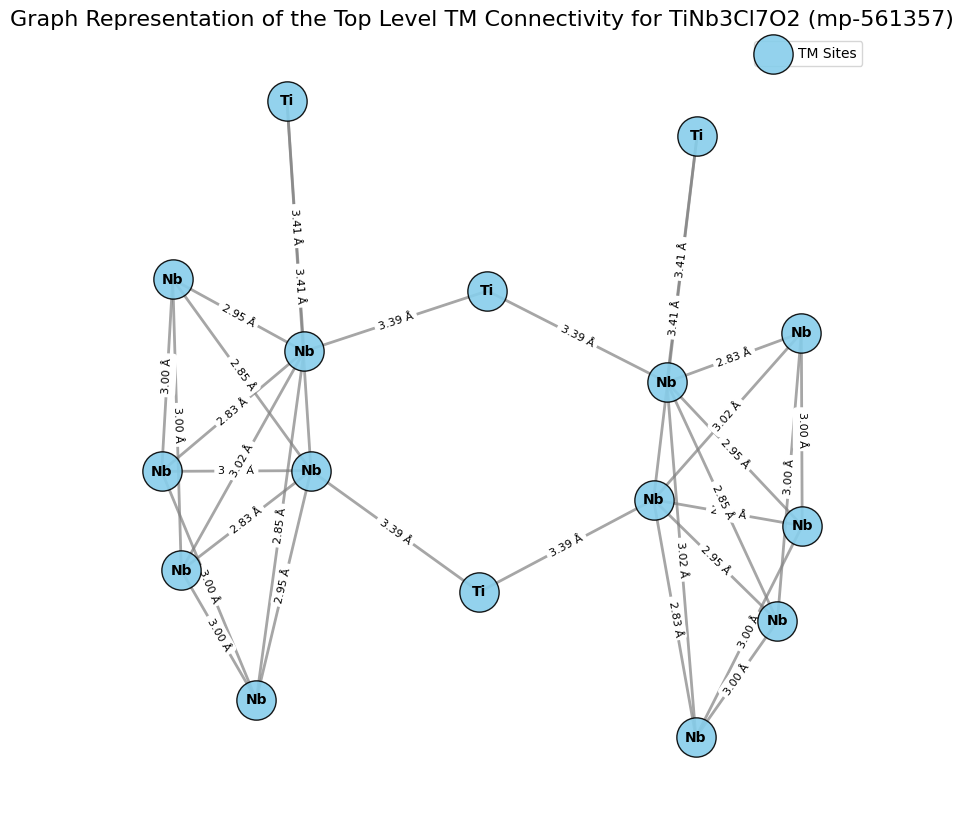

Material ID: mp-29950, Formula: Nb3Cl8


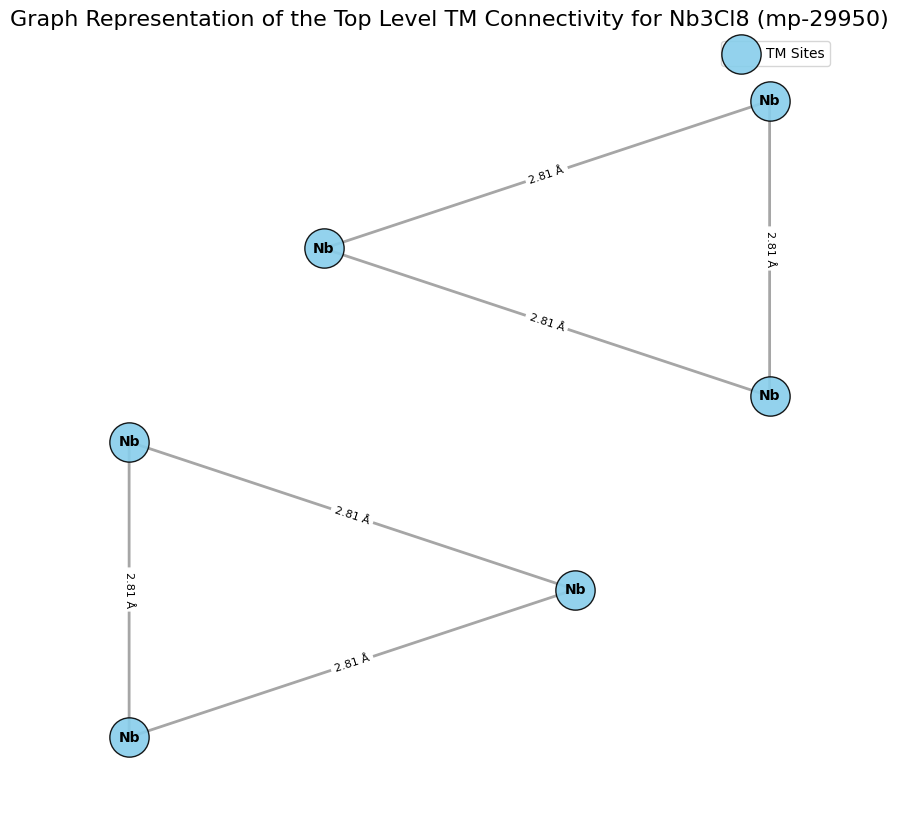

Material ID: mp-1210229, Formula: Nb3In2Cl9


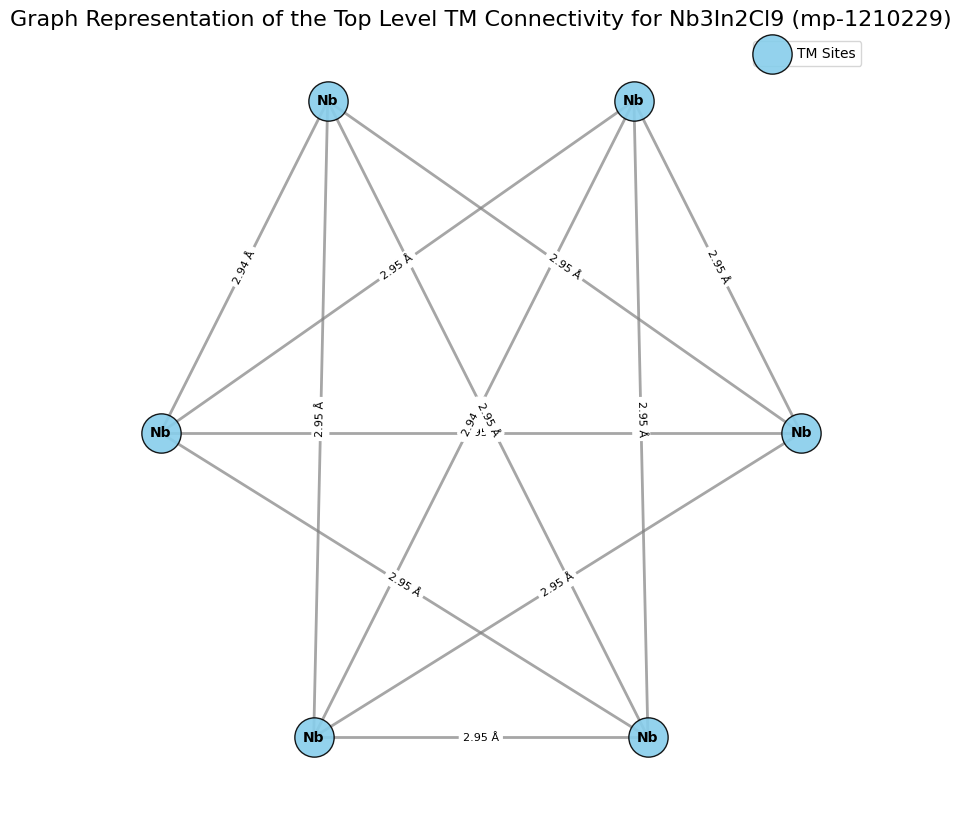

Material ID: mp-1210141, Formula: Nb3Ga2Cl9


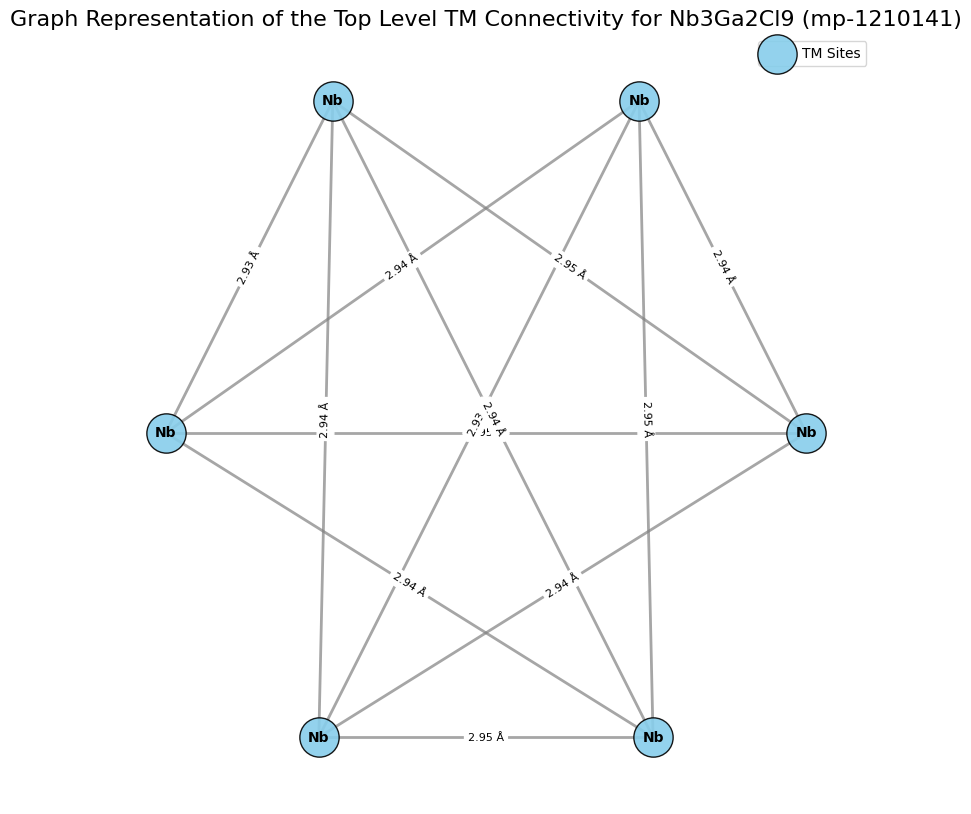

Material ID: mp-1210132, Formula: Nb3TlCuCl9


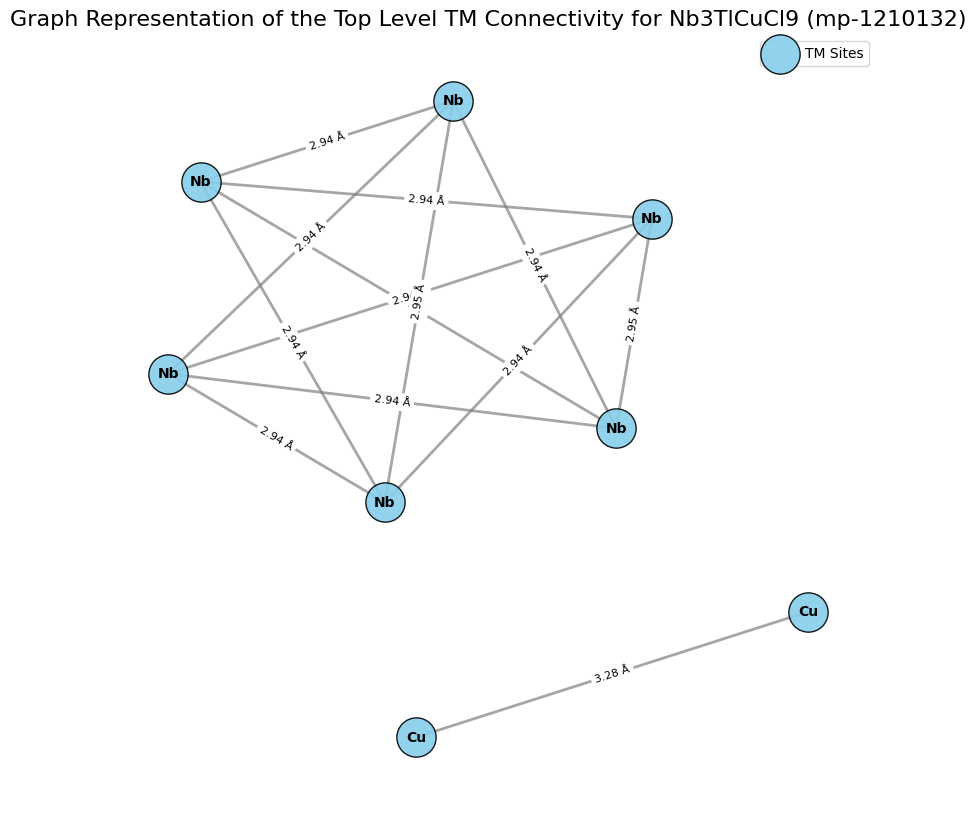

Material ID: mp-569710, Formula: RbNb3CuCl9


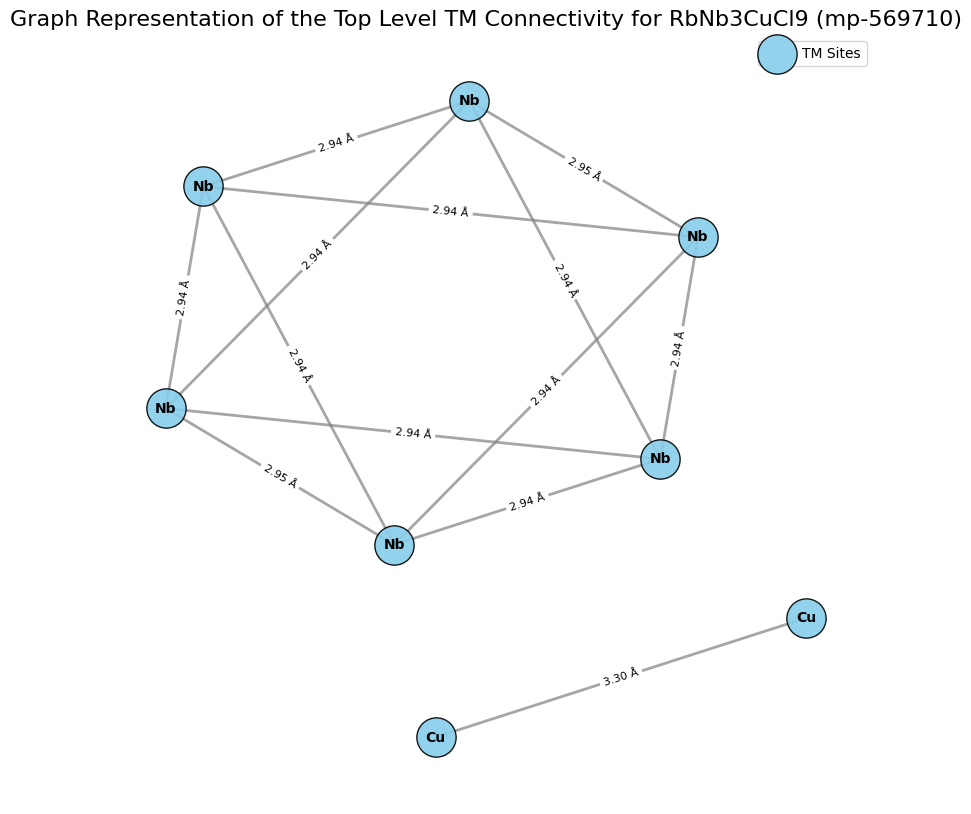

Material ID: mp-570869, Formula: LiNb3InCl9


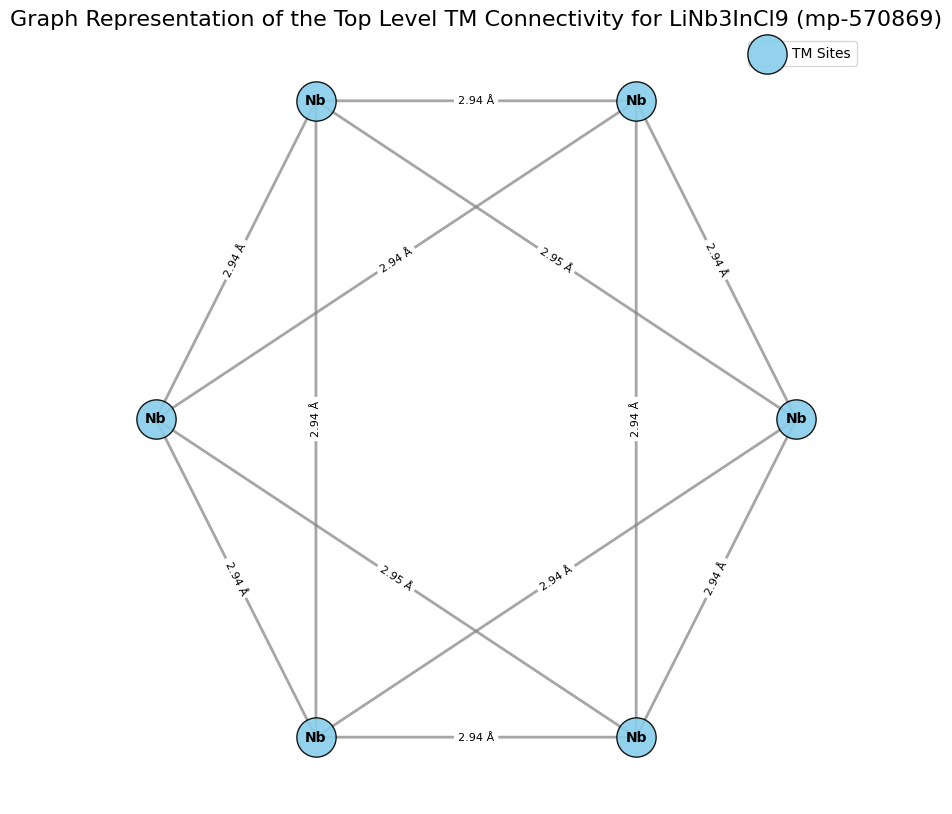

Material ID: mp-661279, Formula: LiNb3InCl9


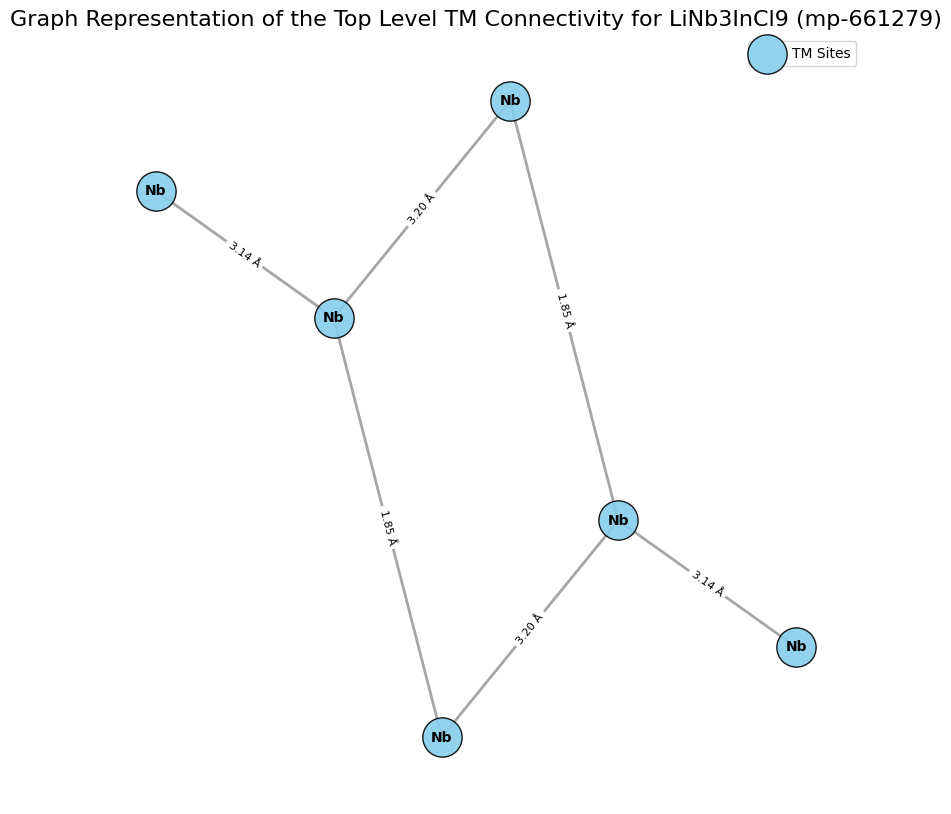

Material ID: mp-555900, Formula: Nb2Tl5S4Cl9


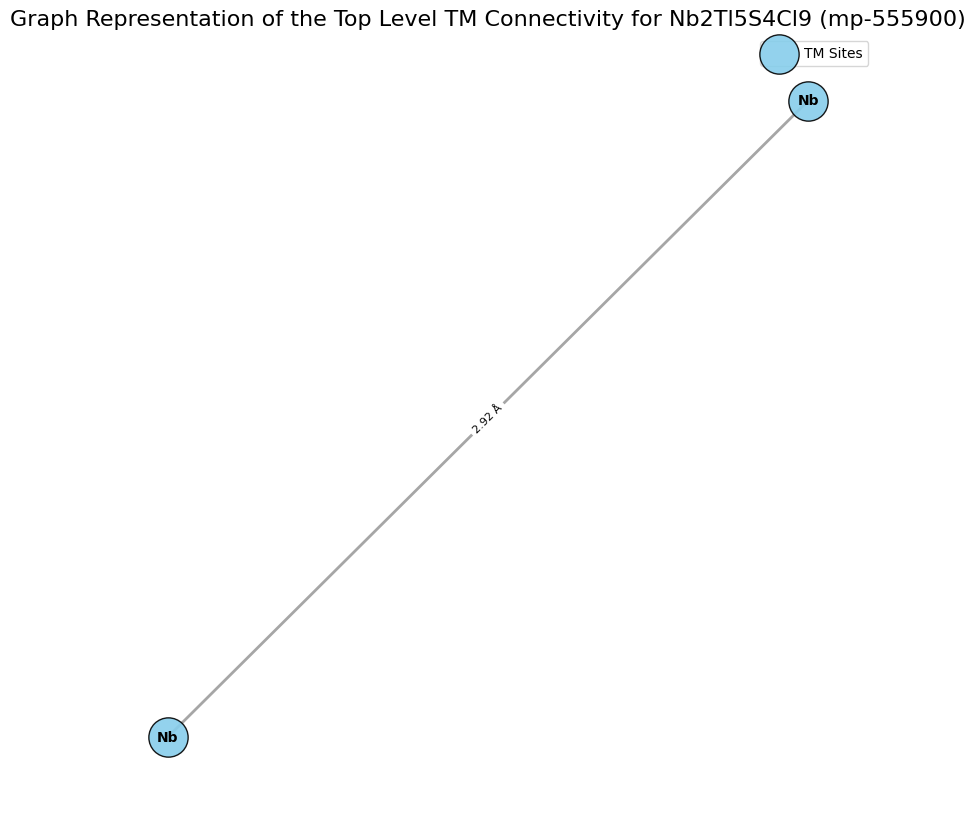

Material ID: mp-1211867, Formula: KNb3VCl11


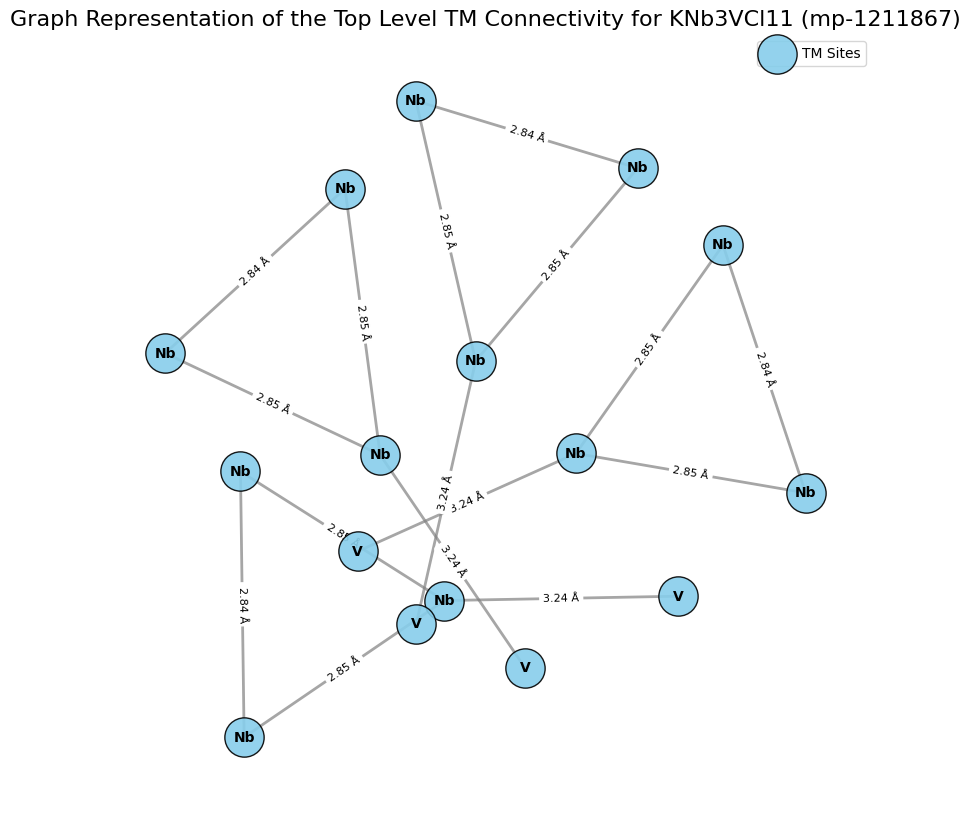

Material ID: mp-1213417, Formula: CsNb3VCl11


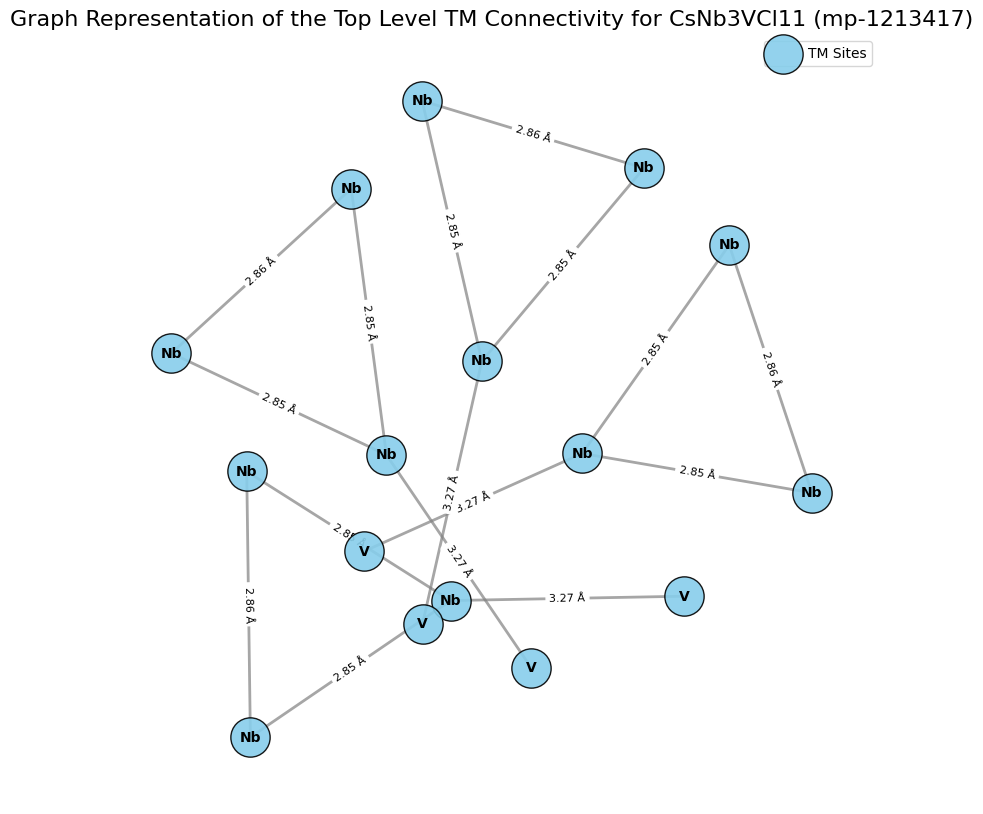

Material ID: mp-570445, Formula: RbNb3VCl11


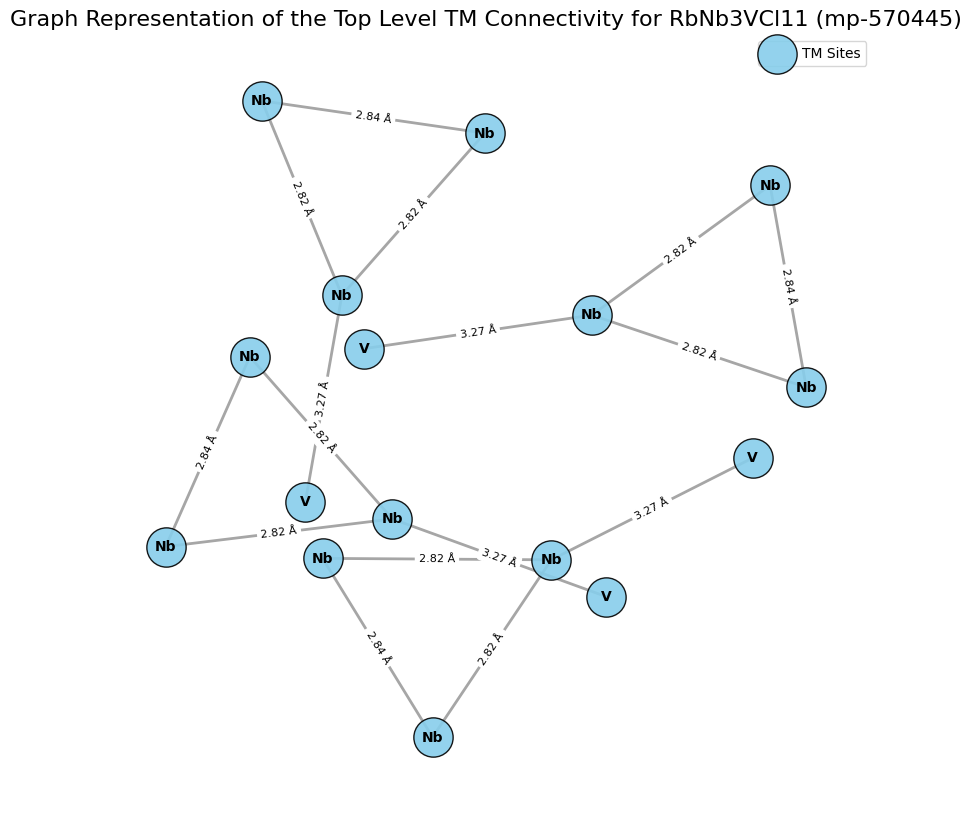

Material ID: mp-680696, Formula: Nb3TlVCl11


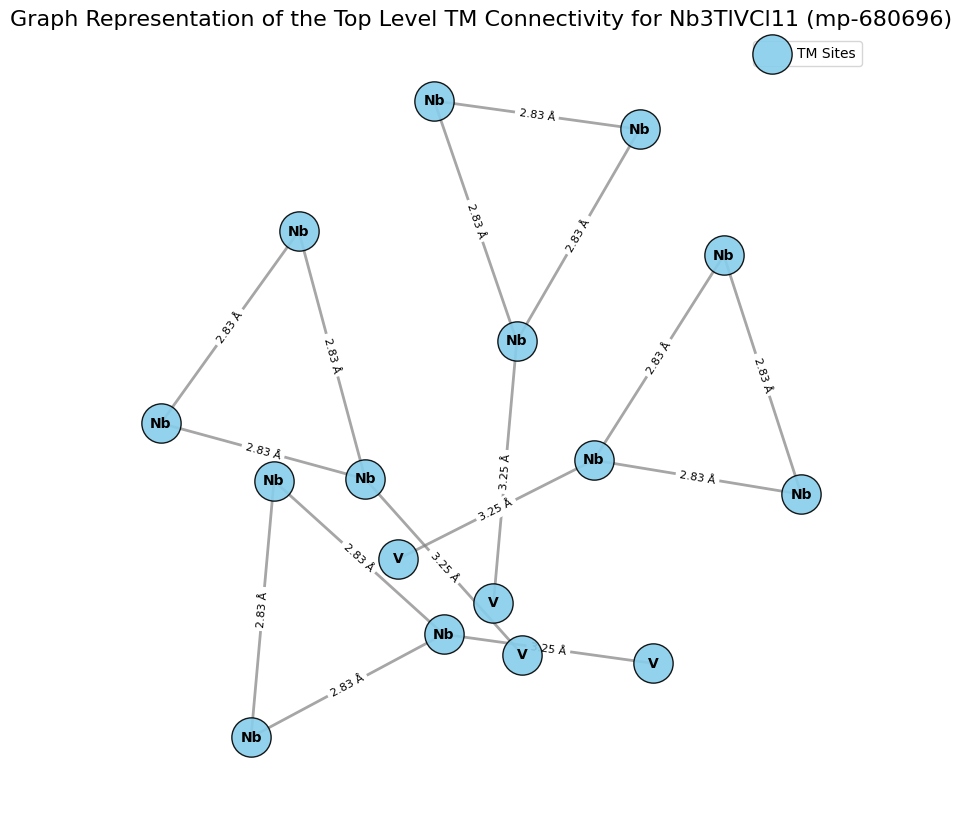

Material ID: mp-1210630, Formula: Nb6TlCl15


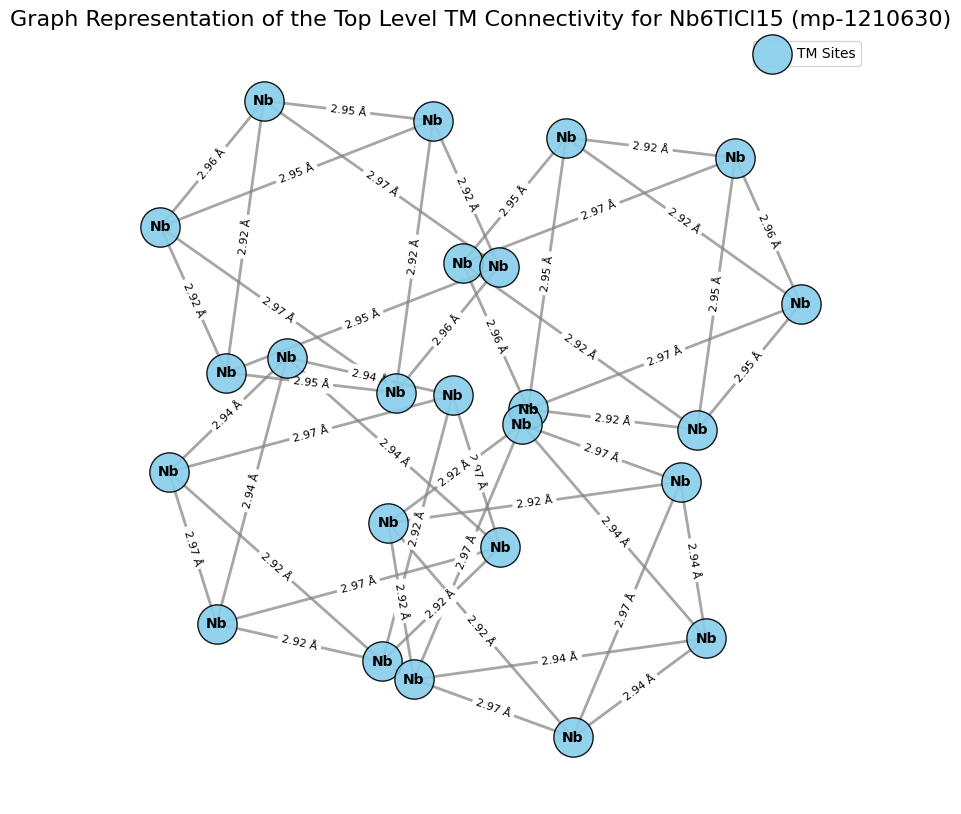

Material ID: mp-651907, Formula: Nb6InCl15


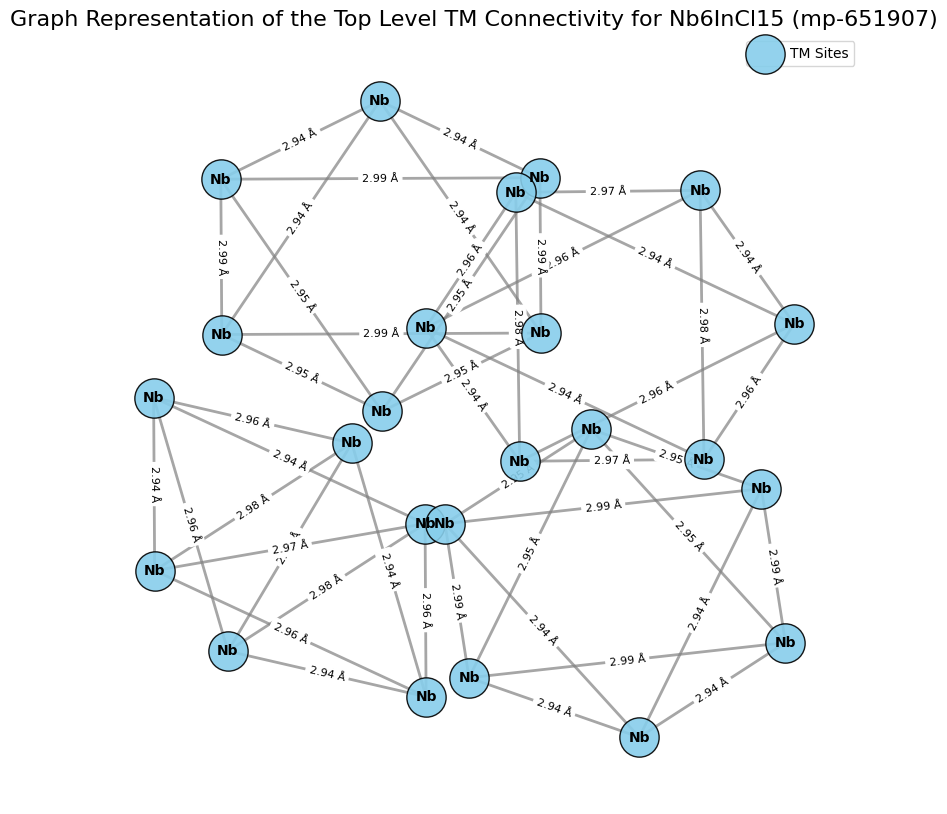

Material ID: mp-29339, Formula: Lu(NbCl3)6


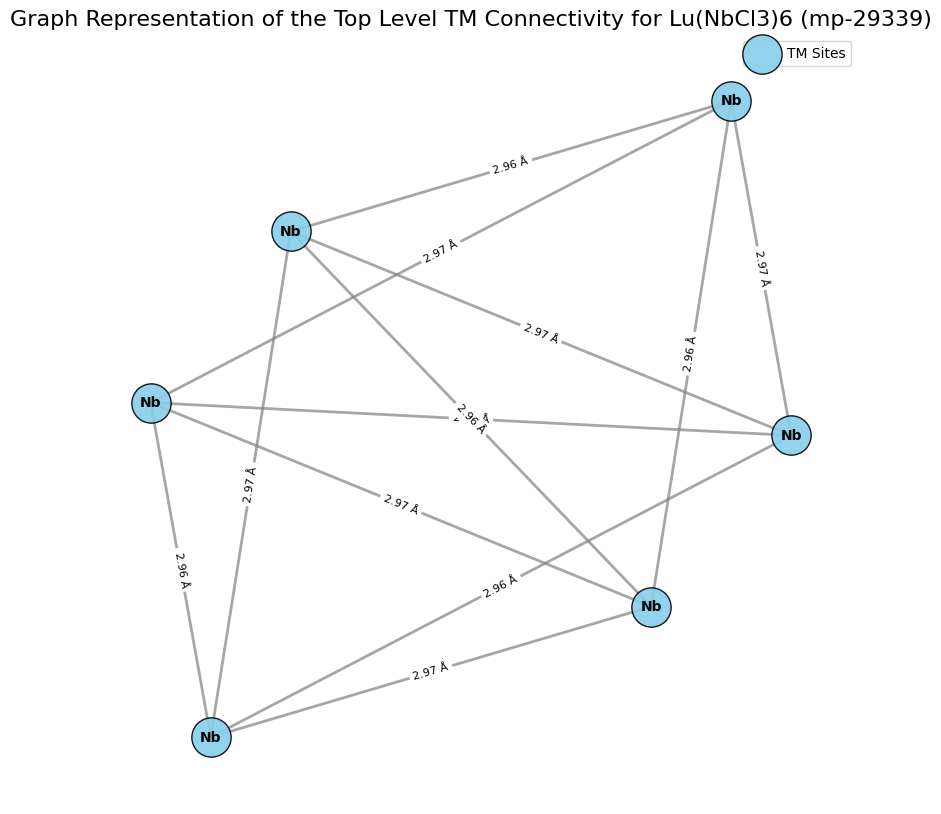

Material ID: mp-1224518, Formula: KGd(NbCl3)6


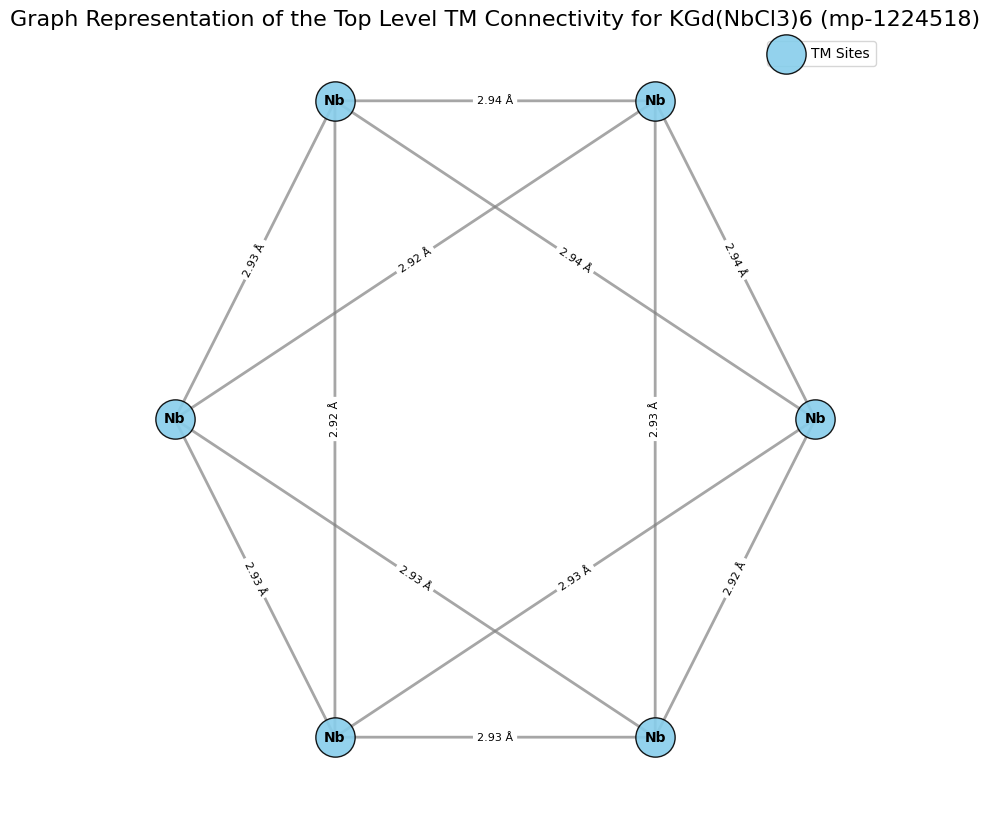

Material ID: mp-568478, Formula: Nb6Tl2VCl18


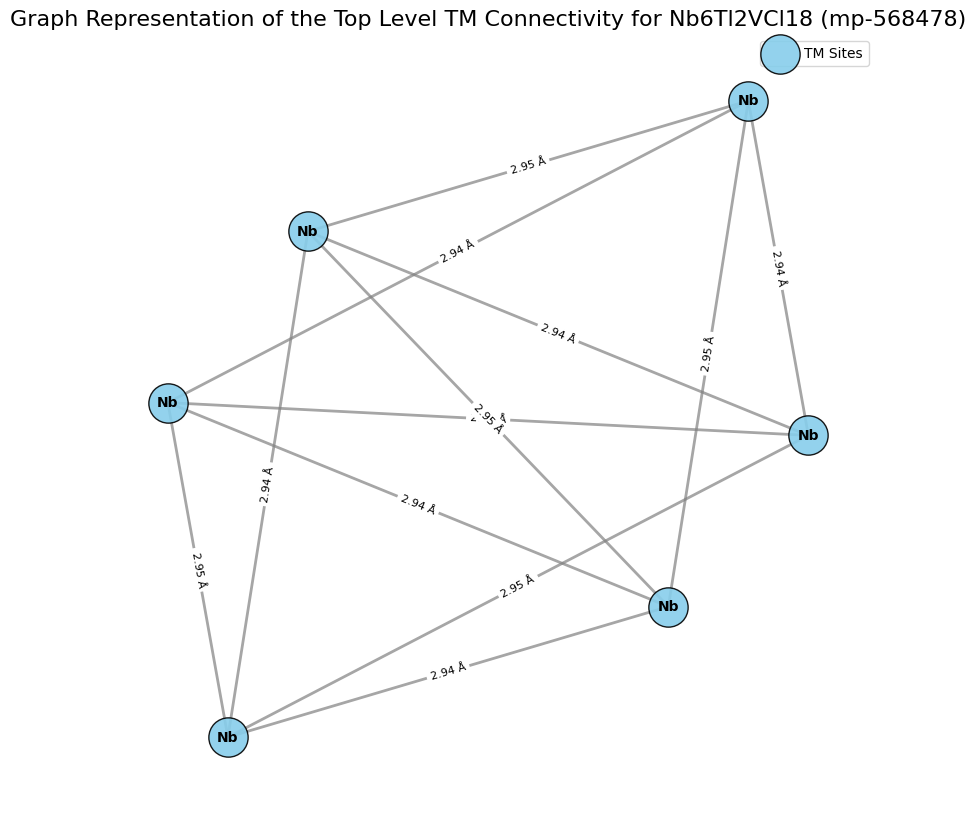

Material ID: mp-570972, Formula: K2Mn(NbCl3)6


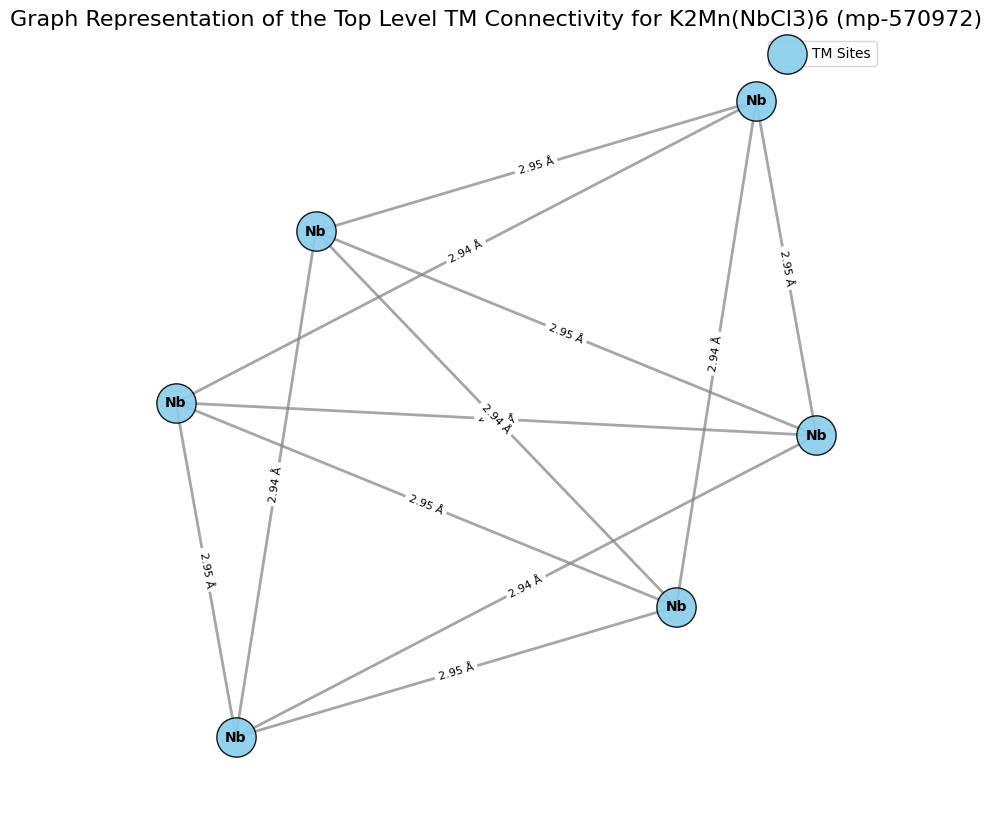

Material ID: mp-569465, Formula: Cs2Nb6PbCl18


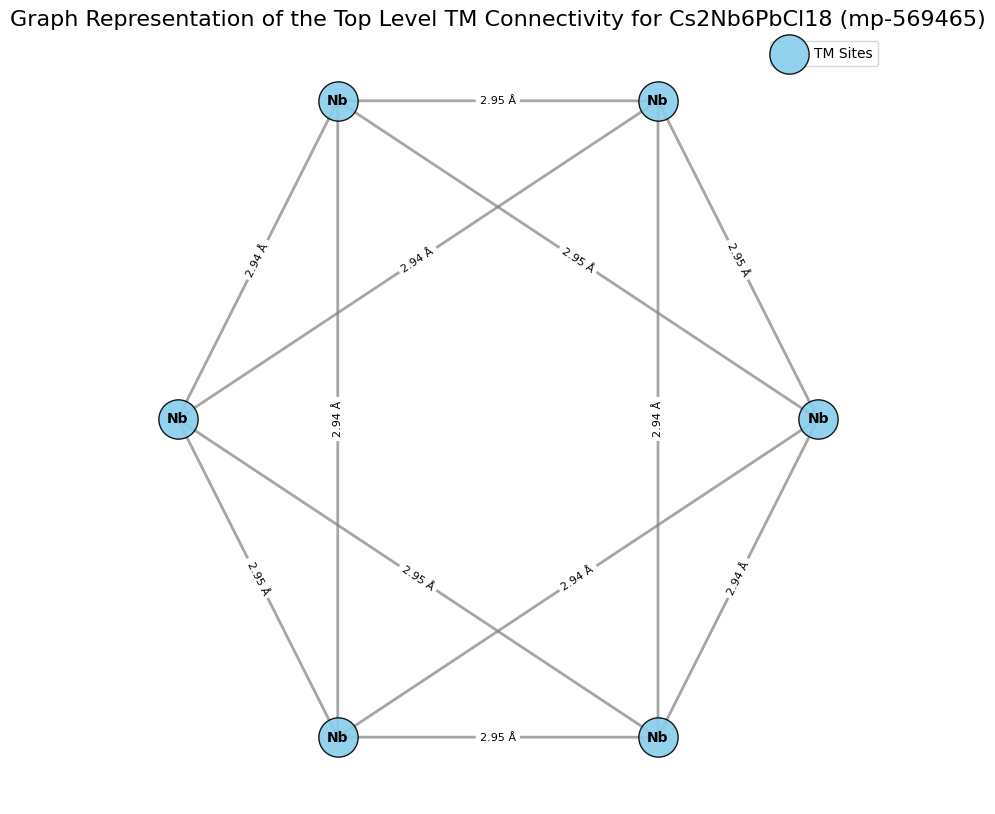

Material ID: mp-778180, Formula: CsTi(NbCl3)6


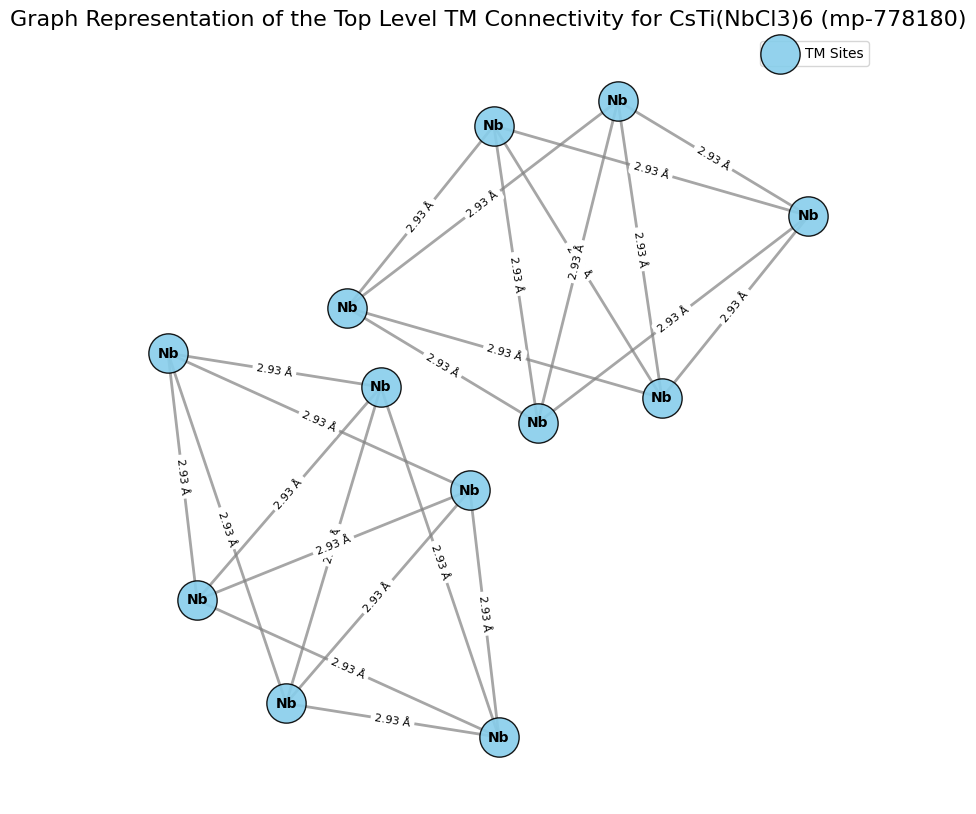

Material ID: mp-570921, Formula: CsLu(NbCl3)6


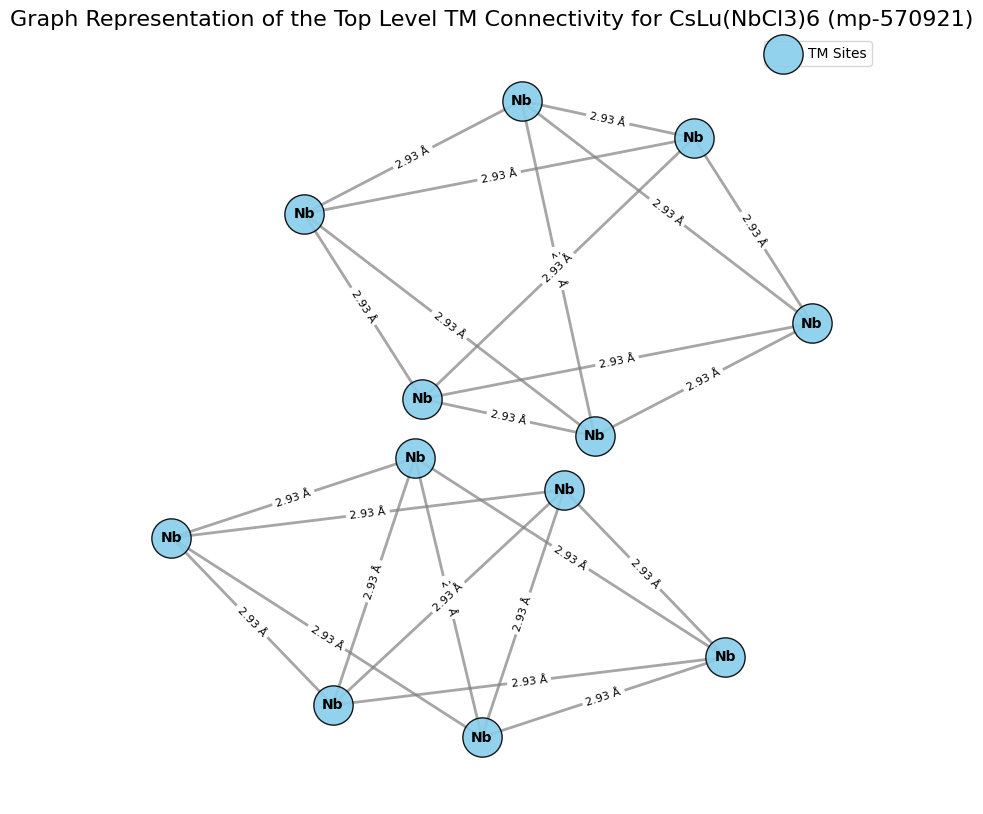

Material ID: mp-1224709, Formula: K(Nb2Cl5)4


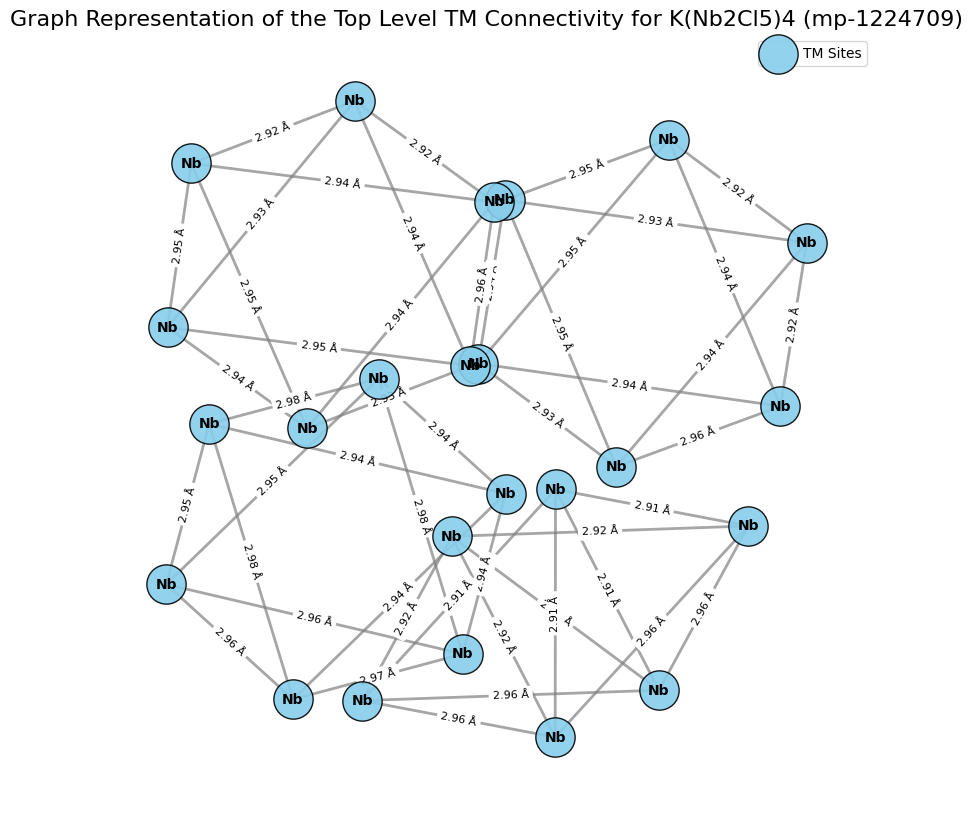

Material ID: mp-686087, Formula: Li3(Nb2Cl5)8


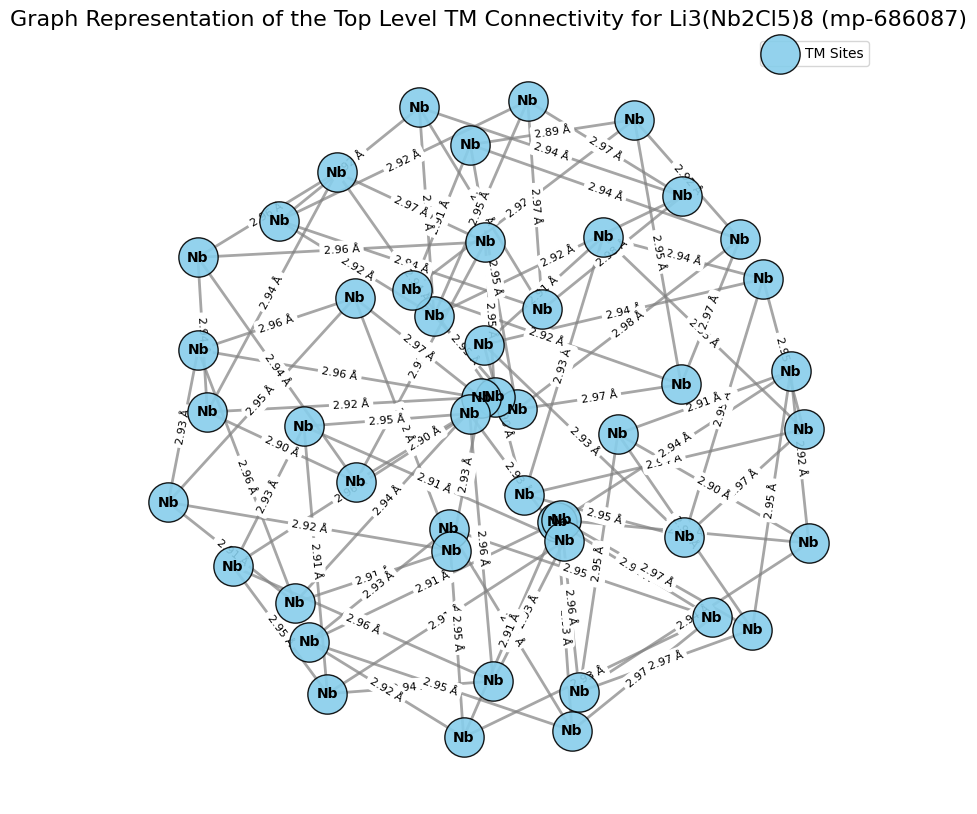


Summary of Cluster Analysis
Total Compounds Analyzed: 54
Compounds with Clusters: 27

0. Material ID: mp-686087
Formula: Li3(Nb2Cl5)8
Total Magnetization: 0.9999998
Number of Clusters: 8
  Cluster 1:
    - Size: 3
    - Average Distance: 2.91 Å
    - Sites in Cluster:
      - Element: Nb, Position: [0.869804   0.3950408  0.91069205]
      - Element: Nb, Position: [0.04190702 0.41170111 0.0163059 ]
      - Element: Nb, Position: [0.9759351  0.51734322 0.10387902]
  Cluster 2:
    - Size: 2
    - Average Distance: 2.89 Å
    - Sites in Cluster:
      - Element: Nb, Position: [0.98529988 0.9586742  0.58816978]
      - Element: Nb, Position: [0.9139603  0.87166154 0.39572189]
  Cluster 3:
    - Size: 2
    - Average Distance: 2.89 Å
    - Sites in Cluster:
      - Element: Nb, Position: [0.91408942 0.5427113  0.51842346]
      - Element: Nb, Position: [0.9852869  0.52652131 0.3973513 ]
  Cluster 4:
    - Size: 3
    - Average Distance: 2.91 Å
    - Sites in Cluster:
      - Element: Nb, P

In [13]:
# Main Workflow for All Entries
compounds_with_clusters = []
for entry in entries:
    material_id = entry.material_id
    formula = entry.formula_pretty
    structure = entry.structure
    total_magnetization = entry.total_magnetization

    connectivity_matrix, tm_indices = create_connectivity_matrix(structure, transition_metals)
    graph = structure_to_graph(connectivity_matrix)

    # Visualize the graph
    visualize_graph(graph, structure, tm_indices, material_id, formula)

    # Find all clusters
    clusters = find_clusters(structure, graph, tm_indices)
    analyzed_clusters = analyze_clusters(clusters, structure.lattice)

    compounds_with_clusters.append({
        "material_id": material_id,
        "formula": formula,
        "total_magnetization": total_magnetization,
        "clusters": analyzed_clusters
    })


# Sort results by number of clusters, and for ties, sort by average distance
compounds_with_clusters.sort(key=lambda x: (-len(x["clusters"]), min((c["average_distance"] for c in x["clusters"]), default=float('inf'))))

# Count compounds with clusters
compounds_with_nonzero_clusters = sum(1 for compound in compounds_with_clusters if len(compound["clusters"]) > 0)

# Output Results
print(f"\nSummary of Cluster Analysis\n{'=' * 30}")
print(f"Total Compounds Analyzed: {len(entries)}")
print(f"Compounds with Clusters: {compounds_with_nonzero_clusters}\n")

for idx, compound in enumerate(compounds_with_clusters):
    print(f"{idx}. Material ID: {compound['material_id']}")
    print(f"Formula: {compound['formula']}")
    print(f"Total Magnetization: {compound['total_magnetization']}")
    print(f"Number of Clusters: {len(compound['clusters'])}")

    if compound["clusters"]:
        for i, cluster in enumerate(compound["clusters"], 1):
            print(f"  Cluster {i}:")
            print(f"    - Size: {cluster['size']}")
            print(f"    - Average Distance: {cluster['average_distance']:.2f} Å")
            print(f"    - Sites in Cluster:")
            for site in cluster["sites"]:
                print(f"      - Element: {site.specie.symbol}, Position: {site.frac_coords}")
    else:
        print("  No clusters found in this structure.")

    print("\n" + "-" * 30)

In [16]:
compounds_with_clusters[9]

{'material_id': MPID(mp-29950),
 'formula': 'Nb3Cl8',
 'total_magnetization': 1.9932237,
 'clusters': [{'size': 3,
   'average_distance': 2.8110747220237013,
   'sites': [PeriodicSite: Nb (3.401, 0.3405, 3.138) [0.5289, 0.05781, 0.2458],
    PeriodicSite: Nb (4.806, 2.775, 3.138) [0.9422, 0.4711, 0.2458],
    PeriodicSite: Nb (1.995, 2.775, 3.138) [0.5289, 0.4711, 0.2458]]},
  {'size': 3,
   'average_distance': 2.8110612895158753,
   'sites': [PeriodicSite: Nb (-5.387e-05, 5.55, 9.63) [0.4711, 0.9422, 0.7542],
    PeriodicSite: Nb (1.406, 3.115, 9.63) [0.4711, 0.5289, 0.7542],
    PeriodicSite: Nb (-1.406, 3.115, 9.63) [0.05776, 0.5289, 0.7542]]}]}

# Visualizing the clusters

In [17]:
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from ase.data.colors import jmol_colors
from ase.data import chemical_symbols
import numpy as np

def visualize_clusters_in_compound(structure, clusters):
    """
    Visualizes clusters in the given structure.

    Parameters:
        structure (Structure): The Pymatgen Structure object.
        clusters (list[dict]): List of clusters. Each cluster is a dictionary containing:
                               - 'sites': List of Pymatgen Site objects in the cluster.
                               - 'size': Size of the cluster (number of sites).
                               - 'average_distance': Average distance between sites in the cluster.
    """
    adaptor = AseAtomsAdaptor()
    atoms = adaptor.get_atoms(structure)

    # Dictionary to keep track of atom types in the legend
    atom_types = {chemical_symbols[atom.number]: jmol_colors[atom.number] * 0.7 for atom in atoms}

    for i, cluster in enumerate(clusters, 1):
        # Reset atom colors to low-saturation colors for all atoms
        atom_colors = np.array([jmol_colors[atom.number] * 0.7 for atom in atoms])

        # Highlight cluster atoms
        cluster_indices = [structure.sites.index(site) for site in cluster["sites"]]
        for idx in cluster_indices:
            atom_colors[idx] = [1.0, 0.0, 0.0]  # High-saturation red for cluster atoms

        # Print cluster details
        print(f"Cluster {i}:")
        print(f"  - Size: {cluster['size']}")
        print(f"  - Average Distance: {cluster['average_distance']:.2f} Å")
        print(f"  - Sites in Cluster:")
        for site in cluster["sites"]:
            print(f"    - Element: {site.specie.symbol}, Position: {site.frac_coords}")

        # Visualize the current cluster
        print(f"Visualizing Cluster {i}...")

        # Create a Matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot atoms with specified colors and perspective view
        plot_atoms(atoms, ax, radii=0.5, rotation="45x,30y,0z", colors=atom_colors)

        # Add a legend for atom types
        legend_handles = []
        for symbol, color in atom_types.items():
            legend_handles.append(
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=symbol)
            )
        legend_handles.append(
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=[1.0, 0.0, 0.0], markersize=10, label='Cluster Atoms')
        )
        ax.legend(handles=legend_handles, loc='lower left', bbox_to_anchor=(1, 1), title='Atom Types')

        # Remove x and y axes
        ax.axis('off')
        # Show plot
        plt.show()


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Cluster 1:
  - Size: 3
  - Average Distance: 2.81 Å
  - Sites in Cluster:
    - Element: Nb, Position: [0.52892174 0.05780542 0.2457612 ]
    - Element: Nb, Position: [0.94224422 0.47112009 0.24575797]
    - Element: Nb, Position: [0.5289287  0.47112269 0.24576323]
Visualizing Cluster 1...


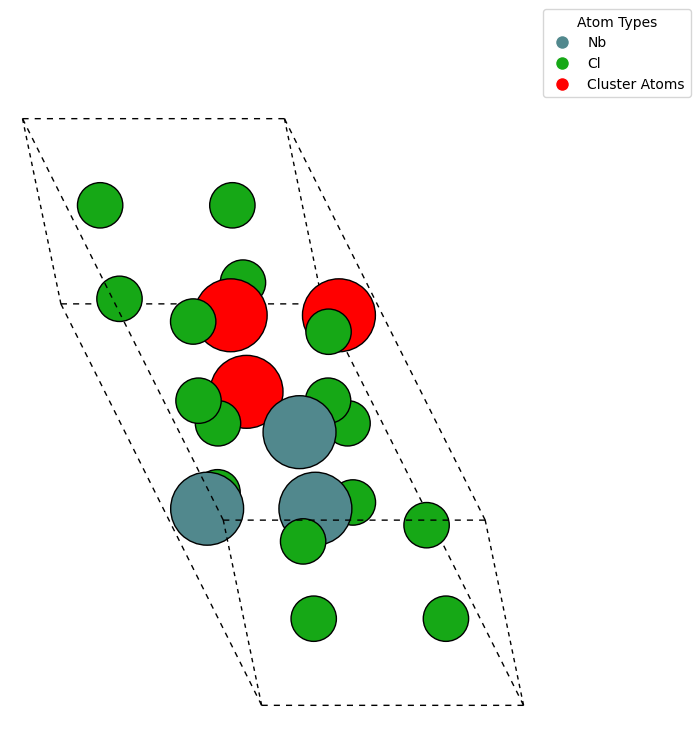

Cluster 2:
  - Size: 3
  - Average Distance: 2.81 Å
  - Sites in Cluster:
    - Element: Nb, Position: [0.47107171 0.94219158 0.75423885]
    - Element: Nb, Position: [0.47108024 0.52888479 0.75423756]
    - Element: Nb, Position: [0.05775819 0.52887322 0.75424259]
Visualizing Cluster 2...


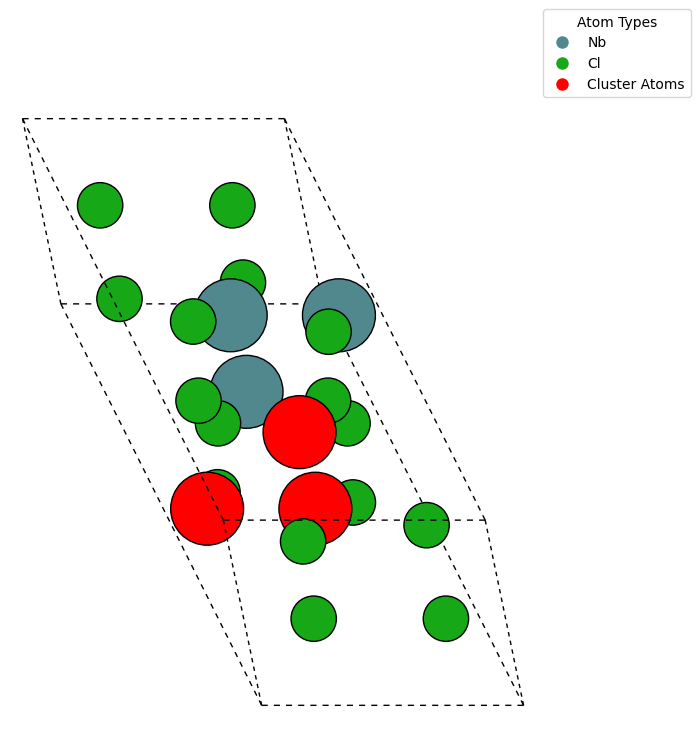

In [18]:
ii = 9
with MPRester(API_KEY) as mpr:
    entry = mpr.materials.summary.search(material_ids=[compounds_with_clusters[ii]["material_id"]],fields=["structure"])[0]

compound["structure"] = entry.structure
visualize_clusters_in_compound(compound["structure"], compounds_with_clusters[ii]["clusters"])

In [27]:
from pymatgen.core import Structure, Lattice, Molecule
from pymatgen.core.periodic_table import DummySpecies
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer

def generate_lattice_with_clusters(structure, clusters, tolerance=1e-5):
    """
    Generate a new primitive lattice using TM clusters as lattice sites.
    Each unique cluster is assigned a distinct DummySpecies label.

    Parameters:
        structure (Structure): The original crystal structure.
        clusters (list[dict]): List of clusters, each containing:
                               - "sites": list of pymatgen Site objects.
        tolerance (float): Distance threshold (in fractional coordinates) for uniqueness.

    Returns:
        tuple: (primitive_structure, conventional_structure)
    """
    # Extract the lattice from the original structure
    lattice = structure.lattice

    # Identify clusters and assign unique labels
    unique_clusters = identify_unique_clusters(clusters)

    cluster_sites = []    # To store unique fractional coordinates
    species_labels = []   # To store DummySpecies labels
    point_groups = {}     # To store point groups for each unique cluster

    for cluster in unique_clusters:
        # Compute the centroid using fractional coordinates
        centroid = calculate_centroid(cluster, lattice)
        # Ensure fractional coordinates are within [0,1)
        fractional_coords = np.mod(lattice.get_fractional_coords(centroid), 1.0)

        cluster_sites.append(fractional_coords)
        # Assign a DummySpecies label based on the cluster's unique identifier
        species_labels.append(DummySpecies(cluster["label"]))
        # Extract species and Cartesian coordinates from the cluster's sites
        species = [site.specie for site in cluster["sites"]]
        cartesian_coords = [site.coords for site in cluster["sites"]]

        # Create a Molecule object
        molecule = Molecule(species, cartesian_coords)

        # Analyze the point group of the molecule
        pga = PointGroupAnalyzer(molecule)
        point_group = pga.get_pointgroup()

        # Store the point group information
        point_groups[cluster["label"]] = point_group

    # Create a new structure with labeled DummySpecies for each cluster type
    primitive_structure = Structure(lattice, species_labels, cluster_sites)

    # Perform symmetry analysis
    sg_analyzer = SpacegroupAnalyzer(primitive_structure)
    conventional_structure = sg_analyzer.get_conventional_standard_structure()

    # Extract symmetry information
    space_group_symbol = sg_analyzer.get_space_group_symbol()

    # Output symmetry information
    print("Primitive Structure:")
    print(primitive_structure)
    print("\nConventional Structure (High Symmetry):")
    print(conventional_structure)
    print("\nSymmetry Analysis:")
    print("  Space Group:", space_group_symbol)
        # Output point group symmetry for each unique cluster
    print("\nPoint Group Symmetry for Unique Clusters:")
    for label, pg in point_groups.items():
        print(f"  Cluster {label}: Point Group = {pg}")

    return primitive_structure, conventional_structure, point_groups


def identify_unique_clusters(clusters):
    """
    Identify clusters and assign unique labels to unique clusters.
    If a cluster is not unique, it gets the same label as the matching unique cluster.

    Parameters:
        clusters (list[dict]): List of clusters.

    Returns:
        list[dict]: All clusters with metadata including their unique labels.
    """
    unique_clusters = []
    cluster_labels = {}

    for i, cluster in enumerate(clusters):
        cluster_size = len(cluster["sites"])
        atom_types = frozenset(site.specie.symbol for site in cluster["sites"])
        cluster_key = (cluster_size, atom_types)

        if cluster_key not in cluster_labels:
            # Assign a new unique label
            unique_label = f"X{len(unique_clusters) + 1}"
            cluster_labels[cluster_key] = unique_label
        else:
            # Use the existing label for non-unique clusters
            unique_label = cluster_labels[cluster_key]

        # Store cluster with its metadata
        unique_clusters.append({
            "label": unique_label,
            "size": cluster_size,
            "atom_types": atom_types,
            "is_unique": cluster_key in cluster_labels,
            "sites": cluster["sites"]
        })

    return unique_clusters

def calculate_centroid(cluster, lattice):
    """
    Calculate the geometric centroid (arithmetic mean) of a cluster using fractional coordinates.

    Parameters:
        cluster (dict): A dictionary representing a cluster containing "sites" (pymatgen Site objects).
        lattice (Lattice): The lattice object from the original structure.

    Returns:
        np.ndarray: The centroid in Cartesian coordinates.
    """
    # Convert each site's Cartesian coordinates to fractional coordinates
    frac_coords = np.array([lattice.get_fractional_coords(site.coords) for site in cluster["sites"]])
    # Compute the average fractional coordinate
    avg_frac = np.mean(frac_coords, axis=0)
    # Convert back to Cartesian coordinates for later use
    centroid_cart = lattice.get_cartesian_coords(avg_frac)
    return centroid_cart

# Example usage:
# Assuming you have an existing pymatgen Structure object "structure" and a list "clusters"
# where each cluster is a dictionary, e.g.:
# clusters = [
#     {"sites": [site1, site2, ...]},   # Cluster 1
#     {"sites": [siteA, siteB, ...]},   # Cluster 2
#     ...
# ]
#
# primitive_structure, conventional_structure = generate_lattice_with_clusters(structure, clusters)

In [28]:
# Example usage:
# Assuming you have a 'structure' object (real crystal structure) and a list of clusters
# structure = Structure.from_file("your_structure_file.cif")  # Load your structure
# clusters = [cluster1, cluster2, cluster3]  # List of clusters (each cluster is a list of atomic sites)

primitive_structure, conventional_structure, point_groups = generate_lattice_with_clusters(compound["structure"], compounds_with_clusters[ii]["clusters"])

Primitive Structure:
Full Formula (X12)
Reduced Formula: X1
abc   :   6.801264   6.801334  12.767930
angles:  89.998101  89.997985 120.000965
pbc   :       True       True       True
Sites (2)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  X10+  0.666698  0.333349  0.245761
  1  X10+  0.333303  0.66665   0.75424

Conventional Structure (High Symmetry):
Full Formula (X12)
Reduced Formula: X1
abc   :   6.801299   6.801299  12.767930
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (2)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  X10+  0.666667  0.333333  0.245761
  1  X10+  0.333333  0.666667  0.754239

Symmetry Analysis:
  Space Group: P-3m1

Point Group Symmetry for Unique Clusters:
  Cluster X1: Point Group = D3h


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core import Structure, Lattice
from pymatgen.core.periodic_table import DummySpecies
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from ase.data.colors import jmol_colors

def visualize_cluster_lattice(conventional_structure,rot):
    """
    Visualizes the conventional unit cell with cluster lattice sites labeled as C(i).

    Parameters:
        conventional_structure (Structure): The Pymatgen Structure object representing the generated unit cell.
    """
    # Create a copy of the structure to avoid modifying the original
    structure_copy = conventional_structure.copy()

    # Replace DummySpecies with a real element (e.g., 'C')
    new_sites = []
    for site in structure_copy.sites:
        if isinstance(site.specie, DummySpecies):
            # Create a new site with 'C' as the species
            new_site = site.__class__(
                lattice=structure_copy.lattice,
                species='C',
                coords=site.frac_coords,
                properties=site.properties
            )
            new_sites.append(new_site)
        else:
            new_sites.append(site)

    # Update the structure's sites with the new list
    structure_copy._sites = new_sites

    # Convert the structure to an ASE Atoms object
    adaptor = AseAtomsAdaptor()
    atoms = adaptor.get_atoms(structure_copy)

    # Assign a unique "C(i)" label to each unique cluster site
    unique_sites = {}
    atom_colors = np.array([jmol_colors[atom.number] * 0.5 for atom in atoms])  # Low-saturation colors

    for i, site in enumerate(structure_copy.sites):
        coord_tuple = tuple(np.round(site.frac_coords, 3))  # Use fractional coordinates to identify uniqueness
        if coord_tuple not in unique_sites:
            unique_sites[coord_tuple] = f'C({len(unique_sites) + 1})'  # Assign cluster index

    # Print site information
    print("Cluster-based lattice sites in the conventional unit cell:")
    for i, (coord, site) in enumerate(zip(structure_copy.frac_coords, structure_copy.sites)):
        label = unique_sites[tuple(np.round(coord, 3))]
        print(f"  {label}: Position (Fractional) {coord}")

    # Create Matplotlib figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot using ASE's plot_atoms
    plot_atoms(atoms, ax, radii=0.5, rotation=rot, colors=atom_colors)

    # Add cluster labels on sites


    # Remove axes and display plot
    ax.axis("off")
    plt.title("Cluster Lattice in the Conventional Unit Cell")
    plt.show()

Cluster-based lattice sites in the conventional unit cell:
  C(1): Position (Fractional) [0.66666667 0.33333333 0.2457608 ]
  C(2): Position (Fractional) [0.33333333 0.66666667 0.7542392 ]


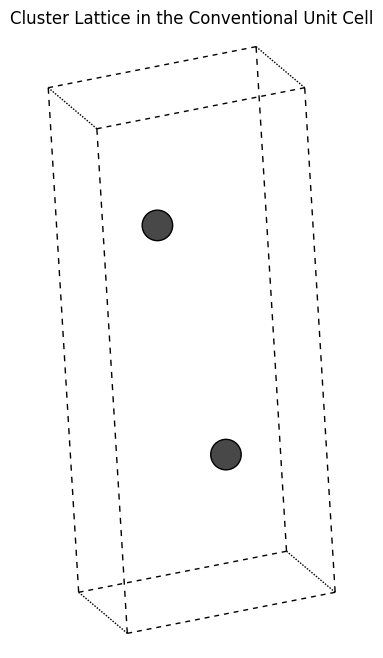

In [29]:
# Example usage:
visualize_cluster_lattice(conventional_structure,"80x,20y,0z")  # Pass the generated unit cell

In [24]:
def generate_supercell(conventional_structure, supercell_matrix=(2, 2, 2)):
    """
    Generates a supercell from the given conventional unit cell.

    Parameters:
        conventional_structure (Structure): The Pymatgen Structure object representing the unit cell.
        supercell_matrix (tuple): Expansion factors along (a, b, c) axes.

    Returns:
        Structure: The expanded supercell.
    """
    supercell = conventional_structure.copy()
    supercell.make_supercell(supercell_matrix)  # Expand unit cell
    return supercell

In [31]:
# Example Usage:
supercell_structure = generate_supercell(conventional_structure, (3,3,3))

Cluster-based lattice sites in the conventional unit cell:
  C(1): Position (Fractional) [0.22222222 0.11111111 0.08192027]
  C(2): Position (Fractional) [0.22222222 0.11111111 0.4152536 ]
  C(3): Position (Fractional) [0.22222222 0.11111111 0.74858693]
  C(4): Position (Fractional) [0.22222222 0.44444444 0.08192027]
  C(5): Position (Fractional) [0.22222222 0.44444444 0.4152536 ]
  C(6): Position (Fractional) [0.22222222 0.44444444 0.74858693]
  C(7): Position (Fractional) [0.22222222 0.77777778 0.08192027]
  C(8): Position (Fractional) [0.22222222 0.77777778 0.4152536 ]
  C(9): Position (Fractional) [0.22222222 0.77777778 0.74858693]
  C(10): Position (Fractional) [0.55555556 0.11111111 0.08192027]
  C(11): Position (Fractional) [0.55555556 0.11111111 0.4152536 ]
  C(12): Position (Fractional) [0.55555556 0.11111111 0.74858693]
  C(13): Position (Fractional) [0.55555556 0.44444444 0.08192027]
  C(14): Position (Fractional) [0.55555556 0.44444444 0.4152536 ]
  C(15): Position (Fractio

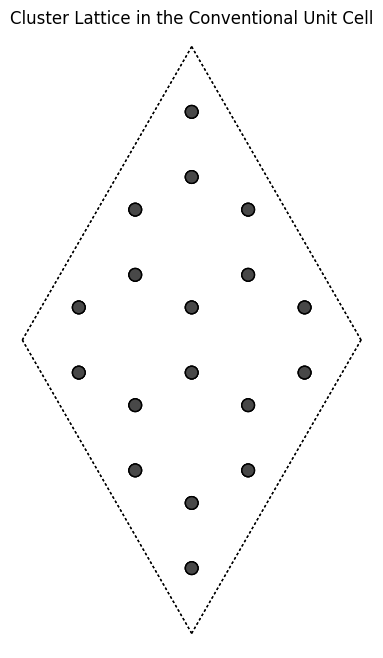

In [32]:
visualize_cluster_lattice(supercell_structure,"0x,0y,0z")

In [33]:
from pymatgen.io.cif import CifWriter

def export_structure_to_cif(structure, filename="output.cif"):
    """
    Export a Pymatgen structure to a CIF file.

    Parameters:
        structure (Structure): The Pymatgen Structure object to be exported.
        filename (str): The filename for the output CIF file.
    """
    writer = CifWriter(structure)
    writer.write_file(filename)
    print(f"CIF file successfully written to {filename}")

# Example usage:
# export_structure_to_cif(conventional_structure, "cluster_lattice.cif")


In [43]:
export_structure_to_cif(conventional_structure, "Nb3Cl8_cluster.cif")

CIF file successfully written to Nb3Cl8_cluster.cif


In [33]:
def classify_dimensionality(supercell):
    """
    Classify the effective dimensionality (0D, 1D, 2D, or 3D) of a supercell that
    contains only the centroid points of identified clusters.

    Parameters:
        supercell (Structure): A pymatgen.core.structure.Structure object whose
                               sites are the centroid points of clusters.

    Returns:
        tuple: (cluster_type, normalized_singular_values)
               where cluster_type is one of "0D", "1D", "2D", or "3D",
               and normalized_singular_values is a list of the normalized singular values.

    The classification uses PCA via singular value decomposition. The idea is that:
      - If only one singular value is significant, the centroids are nearly collinear (0D or 1D).
      - If two are significant, they lie mostly in a plane (1D or 2D).
      - If all three are significant, then the network is volumetric (3D).
    Thresholds (e.g. 0.1) and ratios (e.g. 0.5) are used to distinguish these cases.
    """
    # Extract coordinates for all sites in the supercell
    coords = np.array([site.coords for site in supercell.sites])

    # Center the coordinates (subtract the mean)
    centered = coords - coords.mean(axis=0)

    # Perform SVD (equivalent to PCA for centered data)
    U, s, Vt = np.linalg.svd(centered, full_matrices=False)

    # Normalize singular values to range 0-1 (avoid division by zero)
    if s.max() != 0:
        s_normalized = s / s.max()
    else:
        s_normalized = s

    # Set a threshold to decide if a singular value is significant
    threshold = 0.2

    # Classify based on normalized singular values.
    # Here we assume that we always have three singular values for a 3D structure.
    if len(s_normalized) >= 3:
        # If both second and third singular values are very low, the points are nearly a single point (0D)
        if s_normalized[1] < threshold and s_normalized[2] < threshold:
            cluster_type = "0D"
        # If only the third singular value is insignificant, points lie mainly along a line (1D)
        elif (s_normalized[0]-s_normalized[1]) <= (threshold*0.1) and s_normalized[2] < 0.5:
            cluster_type = "1D"
        # If both the second and third are significant, decide between 2D and 3D using their ratio
        else:
            if s_normalized[2] / s_normalized[1] < 0.8:
                cluster_type = "2D"
            else:
                cluster_type = "3D"
    elif len(s_normalized) == 2:
        if (s_normalized[0]-s_normalized[1]) <= (threshold*0.1):
            cluster_type = "0D"
        else:
            cluster_type = "1D"
    else:
        cluster_type = "0D"

    return cluster_type, s_normalized.tolist()


In [34]:
supercell_structure_l = generate_supercell(conventional_structure, (20,20,20))
cluster_type, norm_svals = classify_dimensionality(supercell_structure_l)
print(f"Supercell Dimensionality: {cluster_type}")
print(f"Normalized Singular Values: {norm_svals}")

Supercell Dimensionality: 2D
Normalized Singular Values: [1.0, 0.6523130522123392, 0.37629993912652754]
